# The Journeys

### Library Import Goes Here

To make library imports readibility easier, it's common practice to place it on the first cell of a notebook

In [1]:
import pandas as pd
import os
from google.cloud import bigquery
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from scipy.stats import spearmanr
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import zscore
import random
import plotly.graph_objects as go

First thing first, like any good data mining process, it starts with ~milk~ data understanding. So let's see what information do we have and working with by importing the data and have quick overview what kind of data inhabits it

In [2]:
df = pd.read_csv(r'ecommerce-session-bigquery.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

<h1><center>My reaction first time seeing the data</center></h1>

<img src="https://media1.tenor.com/m/UZJd1pjj4NMAAAAC/surprised-pikachu.gif" width="300" align="center">

But no need to panic, since the assesor already given clues about the nature about the data itself. The dataset is only a snippet of a much bigger dataset, which is 'data-to-insights.ecommerce.all_sessions' dataset from Google Big Query.

Long story short, I did a little bit of digging and found the followings:

1. The data is typical of what an ecommerce website would see and includes the following information, it contains;

    **Traffic source data:** information about where website visitors originate, including data about organic traffic, paid search traffic, and display traffic

    **Content data:** information about the behavior of users on the site, such as URLs of pages that visitors look at, how they interact with content, etc.

    **Transactional data:** information about the transactions on the Google Merchandise Store website.
    
    
2. The data is actually part of a more complex schema table that analyzing it the way it is prove to be innacurate


3. These are the description of each of the columns, with details in this [link](https://support.google.com/analytics/answer/3437719?hl=en):

    **fullVisitorId:** The unique visitor ID.
    
    **channelGrouping:** The Default Channel Group associated with an end user's session for this View.
    
    **time:** The number of milliseconds after the visitStartTime when this hit was registered. The first hit has a hits.time of 0
   
    **country:** The country from which sessions originated, based on IP address.
   
    **city:** Users' city, derived from their IP addresses or Geographical IDs.
    
    **totalTransactionRevenue:** Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
    
    **transactions:** Total number of ecommerce transactions within the session.
    
    **timeOnSite:** Total time of the session expressed in seconds.
    
    **pageViews:** Total number of pageviews within the session.
    
    **sessionQualityDim:** An estimate of how close a particular session was to transacting, ranging from 1 to 100, calculated for each session. A value closer to 1 indicates a low session quality, or far from transacting, while a value closer to 100 indicates a high session quality, or very close to transacting. A value of 0 indicates that Session Quality is not calculated for the selected time range.
    
    **date:** The date of the session in YYYYMMDD format.
    
    **visitId:** An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId
    
    **type:** The type of hit. One of: "PAGE", "TRANSACTION", "ITEM", "EVENT", "SOCIAL", "APPVIEW", "EXCEPTION".
    
    **productRefundAmount:** The amount processed as part of a refund for a product in local currency, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
    
    **productQuantity:** The quantity of the product purchased.
    
    **productPrice:**  	The price of the product, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
    
    **productRevenue:** The revenue of the product, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
    
    **productSKU:** Product SKU.
    
    **v2ProductName:** Product Name.
    
    **v2ProductCategory:** Product Category.
    
    **productVariant:** Product Variant.
    
    **currencyCode:** The local currency code for the transaction.
    
    **itemQuantity:** The quantity of the product sold.
    
    **itemRevenue:** Total revenue from the item, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).
    
    **transactionRevenue:** This field is deprecated. Use "totals.totalTransactionRevenue" instead.
    
    **transactionId:** The transaction ID of the ecommerce transaction.
    
    **pageTitle:** The page title
    
    **searchKeyword:** If this was a search results page, this is the keyword entered.
    
    **pagePathLevel1:** This dimension rolls up all the page paths in the 1st hierarchical level in pagePath.
    
    **eCommerceAction_type:** The action type. Click through of product lists = 1, Product detail views = 2, Add product(s) to cart = 3, Remove product(s) from cart = 4, Check out = 5, Completed purchase = 6, Refund of purchase = 7, Checkout options = 8, Unknown = 0.
    
    **eCommerceAction_step:** This field is populated when a checkout step is specified with the hit.
    
    **eCommerceAction_option:** This field is populated when a checkout option is specified. For example, a shipping option such as option = 'Fedex'.

Now that the data have been somewhat understood, we will jump into the study case to solve it and potentially improve upon it, let's start by giving it to ChatGPT as prompt and analyze the answers it gives 

**Prompt:**
<img src="./ChatGPT Documentation/Prompt 1.PNG" width="350" align="center">

**Answers:**
<img src="./ChatGPT Documentation/Answers 1.1.PNG" width="350" align="center">
<img src="./ChatGPT Documentation/Answers 1.2.PNG" width="350" align="center">
<img src="./ChatGPT Documentation/Answers 1.3.PNG" width="350" align="center">

The answers itself is helpful and comprehensive, though I think it missed on key sentence in the case study which is **The client wants to better understand user behavior and improve its ecommerce platform**. The answers helped with what the management needs the number 1, 2, and 3 but it doesn't improve upon it and didn't provide any further suggestion, we'll deal with it later, for now let's help the management goals

What I first notice after reading the original dataset documentation is that there are no transactionId.. transactionId is very crucial since that is where details of transactions of each unique fullVisitorId happens. Based on that information I conclude that it would be **impossible** to analyze top products based on total transaction revenue per day using the provided data since there are basically no data to use for the case

**So what's next?**

## Getting more comprehensive and accurate data from BigQuery database

Well, no choice but to use the complete sample dataset from BigQuery database. The idea here is to use eCommerceAction_type = 6, since it represents completed purchase of product(s). Based on ChatGPT answers, the data that I need to get are:

1. Transaction data with product details
2. Transaction data with customers details
3. Timestamps of each transactions

So let's do just that

**Note:** The credentials are absolutely free, I don't have any unfair advantage in terms of this, [go here to learn more](https://cloud.google.com/python/docs/reference/bigquery/latest)

In [4]:
# Setting path to google cloud service account key file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "bigquery-key.json"

In [5]:
client = bigquery.Client()


"""
Specify the project_id and dataset_id, to get the right data project_id will be filled with bigquery-public-data
and dataset_id will be filled with google_analytics_sample
"""
project_id = "bigquery-public-data"
dataset_id = "google_analytics_sample"

selected_columns = [
    'fullVisitorId', 'geoNetwork.country', 'geoNetwork.city',
    'date', 'visitId', 'prod.productRefundAmount',
    'prod.productQuantity', 'prod.productPrice', 'prod.productRevenue', 'prod.productSKU',
    'prod.v2ProductName', 'prod.v2ProductCategory',
    'hits.transaction.currencyCode', 'hits.transaction.transactionId',
    'hits.eCommerceAction.action_type'
]

# Construct the SQL query with the selected columns
query = f"""
    SELECT
        {', '.join(selected_columns)}
    FROM
        `{project_id}.{dataset_id}.ga_sessions_*`,
        UNNEST(hits) as hits,
        UNNEST(hits.product) as prod
    WHERE
        hits.eCommerceAction.action_type = '6'
"""
# Run the query
query_job = client.query(query)

# Fetch the results into a Pandas DataFrame
query_results = query_job.to_dataframe()

In [6]:
query_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fullVisitorId        74457 non-null  object
 1   country              74457 non-null  object
 2   city                 74457 non-null  object
 3   date                 74457 non-null  object
 4   visitId              74457 non-null  Int64 
 5   productRefundAmount  0 non-null      Int64 
 6   productQuantity      36818 non-null  Int64 
 7   productPrice         74457 non-null  Int64 
 8   productRevenue       36818 non-null  Int64 
 9   productSKU           74457 non-null  object
 10  v2ProductName        74457 non-null  object
 11  v2ProductCategory    74457 non-null  object
 12  currencyCode         74457 non-null  object
 13  transactionId        74457 non-null  object
 14  action_type          74457 non-null  object
dtypes: Int64(5), object(10)
memory usage: 8.9+ MB


## 1. Top Products Based on Total Transaction Revenue per Day Analysis

**1.1. Data Preprocessing**

Now that getting more data is done, let's try to solve the first management's problem / request. Quick glance shows that there is still something weird about the queried data, the productQuantity and productRevenue non-null values doesn't match the other data. Let's investigate why

In [7]:
query_results[query_results['transactionId'] == 'ORD201612301028']

fullVisitorId        country                           city  \
19168  6641857110835940627  United States  not available in demo dataset   
19169  6641857110835940627  United States  not available in demo dataset   

           date     visitId  productRefundAmount  productQuantity  \
19168  20161230  1483144929                 <NA>                1   
19169  20161230  1483144929                 <NA>             <NA>   

       productPrice  productRevenue      productSKU  \
19168      74990000        83990000  GGOEGADB059616   
19169      74990000            <NA>  GGOEGADB059616   

                                   v2ProductName v2ProductCategory  \
19168  Google Men's Quilted Insulated Vest Black           Apparel   
19169  Google Men's Quilted Insulated Vest Black           Apparel   

      currencyCode    transactionId action_type  
19168          USD  ORD201612301028           6  
19169          USD  ORD201612301028           6

Based on the investigation, it seems that the data gets **duplicated.** That means "NA" values in productQuantity should be dropped to get the true values of sold products

In [8]:
#Get the needed columns for first problem, which is the transaction and product info and then drop nan values in productQuantity
first_problem_data = query_results[[
    'transactionId', 'productQuantity', 
    'productPrice', 'v2ProductName', 'v2ProductCategory',
    'productSKU', 'currencyCode', 'date'
]].dropna(subset='productQuantity')

first_problem_data

transactionId  productQuantity  productPrice  \
0      ORD201610313767               28        790000   
2      ORD201610313821                1      44790000   
3      ORD201610313821                1      30390000   
4      ORD201610313821                2      44790000   
8      ORD201610313831               30       1590000   
...                ...              ...           ...   
74435  ORD201608101808                1      79990000   
74436  ORD201608101808                1       2000000   
74437  ORD201608101808                1      13590000   
74438  ORD201608101808                1       7190000   
74439  ORD201608101808                1       3990000   

                                           v2ProductName v2ProductCategory  \
0                                               Maze Pen            Office   
2                           Google Women's Fleece Hoodie           Apparel   
3                            Google Infant Zip Hood Pink           Apparel   
4                           Google Women's Fleece Hoodie           Apparel   
8                                       Google Kick Ball         Lifestyle   
...                                                  ...               ...   
74435                                  Solo Pro Backpack         (not set)   
74436                            Ballpoint LED Light Pen         (not set)   
74437  Google Men's 100% Cotton Short Sleeve Hero Tee...         (not set)   
74438                        Engraved Ceramic Google Mug         (not set)   
74439                        Electronics Accessory Pouch         (not set)   

           productSKU currencyCode      date  
0      GGOEGGOA017399          USD  20161031  
2      GGOEGAQB036014          USD  20161031  
3      GGOEGAWN062748          USD  20161031  
4      GGOEGAQB036013          USD  20161031  
8      GGOEGFSR022099          USD  20161031  
...               ...          ...       ...  
74435  GGOEGBRB013899          USD  20160810  
74436  GGOEGOAQ012899          USD  20160810  
74437  GGOEGAAB010514          USD  20160810  
74438  GGOEGDWC020199          USD  20160810  
74439  GGOEGBFC018799          USD  20160810  

[36818 rows x 8 columns]

Now that I've got the required dataset, let's check for NaN values again and then check if there are different currencyCode other than USD

In [9]:
first_problem_data.isna().sum()

transactionId        0
productQuantity      0
productPrice         0
v2ProductName        0
v2ProductCategory    0
productSKU           0
currencyCode         0
date                 0
dtype: int64

In [10]:
first_problem_data['currencyCode'].nunique()

1

No NaN values and there is only 1 currencyCode, which is USD, nice!

**1.2. Data Processing**

**Let's get back to ChatGPT answer about the first problem and find ways to improve upon it**


<img src="./ChatGPT Documentation/Answers 1.1.PNG" width="350" align="center">

Now that I read it again, this problem is product oriented and I think improvements can be made by;

1. Showing the bottom products also to provide insights on underperfoming products
2. Showing the perfomance based on productCategories to provide better insight on high and low performing product categories overall
3. Show monthly sales products to provide better insights on high and low demand products
4. Show monthly sales of product categories to provide better insights on high and low demand products categories
5. Correlation analysis on product quantity and product price for improvement in pricing strategies
6. Show the frequently purchased together products based on queried product, for cross-selling opportunities

**1.2.1. Building the needed functions**

**Function for showing top and bottom performing product based on their contribution on total revenue per day**

This function will visualize the top and bottom performing products where it recieves the original dataframe needed, number of products to visualize, and the size of text's font. It displays horizontal bar chart visualization in 1 row and 2 columns grid layout

In [11]:
def visualize_top_bottom_products(original_data, num_products=5, text_fontsize=20):
    """
    Visualizes the top and bottom performing products based on their contribution
    to total revenue on a daily basis.

    Parameters:
    - original_data (pd.DataFrame): The original dataset containing product information.
    - num_products (int): Number of top and bottom performing products to display.
    - text_fontsize (int): Font size for text in the plot.

    Returns:
    None (Displays a grid-style chart with top and bottom performing products).
    """

    # Create a copy of the original dataframe to avoid accidental modification to the original dataframe
    data = original_data.copy()

    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # Convert the product price to its original form
    data['productPrice'] = data['productPrice'] / 1e6

    # Step 1: Calculate total revenue per day
    total_revenue_per_day = data.groupby('date')[['productQuantity', 'productPrice']].sum()
    total_revenue_per_day['total_revenue'] = total_revenue_per_day['productQuantity'] * total_revenue_per_day['productPrice']
    days_available = (data['date'].max() - data['date'].min()).days + 1
    total_revenue_per_day['total_revenue_per_day'] = total_revenue_per_day['total_revenue'] / days_available

    # Step 2: Calculate revenue per day for each product
    product_revenue_per_day = data.groupby(['v2ProductName', 'date']).agg({'productQuantity': 'sum', 'productPrice': 'mean'})
    product_revenue_per_day['total_revenue'] = product_revenue_per_day['productQuantity'] * product_revenue_per_day['productPrice']
    product_revenue_per_day = product_revenue_per_day.groupby('v2ProductName')['total_revenue'].sum().reset_index()
    product_revenue_per_day['revenue_per_day'] = product_revenue_per_day['total_revenue'] / days_available

    # Step 3: Calculate product performance
    product_performance = product_revenue_per_day.copy()
    product_performance['performance'] = product_performance['revenue_per_day'] / total_revenue_per_day['total_revenue_per_day'].mean()

    # Step 4: Visualize top and bottom performing products in a grid-style chart
    top_products = product_performance.nlargest(num_products, 'performance')
    bottom_products = product_performance.nsmallest(num_products, 'performance')

    # Visualization for top and bottom performing products
    plt.figure(figsize=(35, 18))

    # Top performing products
    plt.subplot(1, 2, 1)
    bars_top = plt.barh(top_products['v2ProductName'][::-1], top_products['performance'][::-1], color='green')
    plt.xlabel('Product Contribution Percentage to Total Revenue on Daily Basis', fontsize=text_fontsize)
    plt.ylabel('Product', fontsize=text_fontsize)
    plt.title(f'Top {num_products} Performing Products', fontsize=text_fontsize)

    # Display percentage values and revenue on the bars
    for bar, revenue in zip(bars_top, top_products['revenue_per_day'][::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2%} - ${revenue:.2f}',
                 va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels in the first subplot
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    # Bottom performing products
    plt.subplot(1, 2, 2)
    bars_bottom = plt.barh(bottom_products['v2ProductName'], bottom_products['performance'], color='red')
    plt.xlabel('Product Contribution Percentage to Total Revenue on Daily Basis', fontsize=text_fontsize)
    plt.ylabel('Product', fontsize=text_fontsize)
    plt.title(f'Bottom {num_products} Performing Products', fontsize=text_fontsize)

    # Display percentage values and revenue on the bars
    for bar, revenue in zip(bars_bottom, bottom_products['revenue_per_day']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2%} - ${revenue:.2f}',
                 va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    plt.tight_layout()
    plt.show()

**Function for showing top and bottom performing product categories based on their contribution on total revenue per day**

This function will visualize the top and bottom performing products categories where it recieves the original dataframe needed, number of product's categories to visualize, and the size of text's font. It displays horizontal bar chart visualization in 1 row and 2 columns grid layout

In [12]:
def visualize_top_bottom_categories(original_data, num_categories=5, text_fontsize=20):
    """
    Visualizes the top and bottom performing product categories based on their
    contribution to total revenue on a daily basis.

    Parameters:
    - original_data (pd.DataFrame): The original dataset containing product information.
    - num_categories (int): Number of top and bottom performing categories to display.
    - text_fontsize (int): Font size for text in the plot.

    Returns:
    None (Displays a grid-style chart with top and bottom performing categories).
    """
    # Create a copy of the original dataframe to avoid modification
    data = original_data.copy()

    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # Normalize product prices by dividing by 1e6
    data['productPrice'] = data['productPrice'] / 1e6

    # Step 1: Calculate total revenue per day
    total_revenue_per_day = data.groupby('date')[['productQuantity', 'productPrice']].sum()
    total_revenue_per_day['total_revenue'] = total_revenue_per_day['productQuantity'] * total_revenue_per_day['productPrice']

    # Calculate the number of days available in the dataset
    days_available = (data['date'].max() - data['date'].min()).days + 1

    # Calculate total revenue per day considering the available days
    total_revenue_per_day['total_revenue_per_day'] = total_revenue_per_day['total_revenue'] / days_available

    # Step 2: Calculate revenue per day for each category
    category_revenue_per_day = data.groupby(['v2ProductCategory', 'date']).agg({'productQuantity': 'sum', 'productPrice': 'mean'})
    category_revenue_per_day['total_revenue'] = category_revenue_per_day['productQuantity'] * category_revenue_per_day['productPrice']
    category_revenue_per_day = category_revenue_per_day.groupby('v2ProductCategory')['total_revenue'].sum().reset_index()
    category_revenue_per_day['revenue_per_day'] = category_revenue_per_day['total_revenue'] / days_available

    # Step 3: Calculate category performance
    category_performance = category_revenue_per_day.copy()
    category_performance['performance'] = category_performance['revenue_per_day'] / total_revenue_per_day['total_revenue_per_day'].mean()

    # Step 4: Visualize top and bottom performing categories in a grid-style chart
    top_categories = category_performance.nlargest(num_categories, 'performance')
    bottom_categories = category_performance.nsmallest(num_categories, 'performance')

    # Visualization for top and bottom performing categories
    plt.figure(figsize=(35, 18))

    # Top performing categories
    plt.subplot(1, 2, 1)
    bars_top = plt.barh(top_categories['v2ProductCategory'][::-1], top_categories['performance'][::-1], color='green')
    plt.xlabel('Category Contribution Percentage to Total Revenue on Daily Basis', fontsize=text_fontsize)
    plt.ylabel('Category', fontsize=text_fontsize)
    plt.title(f'Top {num_categories} Performing Categories', fontsize=text_fontsize)

    # Display percentage values and revenue on the bars
    for bar, revenue in zip(bars_top, top_categories['revenue_per_day'][::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%} - ${revenue:.2f}', va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels in the first subplot
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    # Bottom performing categories
    plt.subplot(1, 2, 2)
    bars_bottom = plt.barh(bottom_categories['v2ProductCategory'], bottom_categories['performance'], color='red')
    plt.xlabel('Category Contribution Percentage to Total Revenue on Daily Basis', fontsize=text_fontsize)
    plt.ylabel('Category', fontsize=text_fontsize)
    plt.title(f'Bottom {num_categories} Performing Categories', fontsize=text_fontsize)

    # Display percentage values and revenue on the bars
    for bar, revenue in zip(bars_bottom, bottom_categories['revenue_per_day']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%} - ${revenue:.2f}', va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    plt.tight_layout()
    plt.show()

**Function for showing top and bottom monthly sales of product**

This function will visualize the top and bottom total monthly sales of products where it recieves the original dataframe needed, number of product's to visualize, and the size of text's font. It displays horizontal bar chart visualization in 1 row and 2 columns grid layout

In [13]:
def monthly_sales_insights(original_data, num_products=5, text_fontsize=20):
    """
    Visualizes the overall product performance based on the total sales quantity per product for each month.

    Parameters:
    - original_data (pd.DataFrame): The original dataset containing product information.
    - num_products (int): Number of top and bottom performing products to display.
    - text_fontsize (int): Font size for text in the plot.
    - figsize (tuple): Figure size for the plot.

    Returns:
    None (Displays a horizontal bar chart with top and bottom performing products based on overall sales quantity).
    """
    # Create a copy of the original dataframe to avoid modification
    data = original_data.copy()

    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # Extract month and year from the 'date' column
    data['month_year'] = data['date'].dt.to_period('M')

    # Calculate total sales quantity per product for each month
    monthly_sales = data.groupby(['v2ProductName', 'month_year'])['productQuantity'].sum().reset_index()

    # Calculate total sales quantity per product across months
    total_sales = monthly_sales.groupby('v2ProductName')['productQuantity'].sum().reset_index()

    # Visualize top and bottom performing products based on overall sales quantity
    top_products = total_sales.nlargest(num_products, 'productQuantity')
    bottom_products = total_sales.nsmallest(num_products, 'productQuantity')

    # Visualization for top and bottom performing products
    plt.figure(figsize=(35, 18))
    
    # Top performing products
    plt.subplot(1, 2, 1)
    bars_top = plt.barh(top_products['v2ProductName'][::-1], top_products['productQuantity'][::-1], color='green')
    plt.xlabel('Total Sales Quantity', fontsize=text_fontsize)
    plt.ylabel('Product', fontsize=text_fontsize)
    plt.title(f'Top {num_products} in Demand Products', fontsize=text_fontsize)
    
    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    # Display sales quantity on the bars
    for bar, quantity in zip(bars_top, top_products['productQuantity'][::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{quantity}', va='center', fontsize=text_fontsize)

    # Bottom performing products
    plt.subplot(1, 2, 2)
    bars_bottom = plt.barh(bottom_products['v2ProductName'], bottom_products['productQuantity'], color='red')
    plt.xlabel('Total Sales Quantity', fontsize=text_fontsize)
    plt.ylabel('Product', fontsize=text_fontsize)
    plt.title(f'Bottom {num_products} in Demand Products', fontsize=text_fontsize)

    # Display sales quantity on the bars
    for bar, quantity in zip(bars_bottom, bottom_products['productQuantity']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{quantity}', va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)
    
    plt.tight_layout()
    plt.show()

**Function for showing monthly sales of product categories**

This function will visualize the top and bottom total monthly sales of product's categories where it recieves the original dataframe needed, number of product's categories to visualize, and the size of text's font. It displays horizontal bar chart visualization in 1 row and 2 columns grid layout

In [14]:
def monthly_sales_insights_categories(original_data, num_categories=5, text_fontsize=20):
    """
    Visualizes the overall product category performance based on the total sales quantity per category for each month.

    Parameters:
    - original_data (pd.DataFrame): The original dataset containing product information.
    - num_categories (int): Number of top and bottom performing categories to display.
    - text_fontsize (int): Font size for text in the plot.

    Returns:
    None (Displays a horizontal bar chart with top and bottom performing categories based on overall sales quantity).
    """
    # Create a copy of the original dataframe to avoid modification
    data = original_data.copy()

    # Convert the 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # Extract month and year from the 'date' column
    data['month_year'] = data['date'].dt.to_period('M')

    # Calculate total sales quantity per category for each month
    monthly_sales = data.groupby(['v2ProductCategory', 'month_year'])['productQuantity'].sum().reset_index()

    # Calculate total sales quantity per category across months
    total_sales = monthly_sales.groupby('v2ProductCategory')['productQuantity'].sum().reset_index()

    # Visualize top and bottom performing categories based on overall sales quantity
    top_categories = total_sales.nlargest(num_categories, 'productQuantity')
    bottom_categories = total_sales.nsmallest(num_categories, 'productQuantity')

    # Visualization for top and bottom performing categories
    plt.figure(figsize=(35, 18))

    # Top performing categories
    plt.subplot(1, 2, 1)
    bars_top = plt.barh(top_categories['v2ProductCategory'][::-1], top_categories['productQuantity'][::-1], color='green')
    plt.xlabel('Total Sales Quantity', fontsize=text_fontsize)
    plt.ylabel('Product Category', fontsize=text_fontsize)
    plt.title(f'Top {num_categories} in Demand Categories', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    # Display sales quantity on the bars
    for bar, quantity in zip(bars_top, top_categories['productQuantity'][::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{quantity}', va='center', fontsize=text_fontsize)

    # Bottom performing categories
    plt.subplot(1, 2, 2)
    bars_bottom = plt.barh(bottom_categories['v2ProductCategory'], bottom_categories['productQuantity'], color='red')
    plt.xlabel('Total Sales Quantity', fontsize=text_fontsize)
    plt.ylabel('Product Category', fontsize=text_fontsize)
    plt.title(f'Bottom {num_categories} in Demand Categories', fontsize=text_fontsize)

    # Display sales quantity on the bars
    for bar, quantity in zip(bars_bottom, bottom_categories['productQuantity']):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{quantity}', va='center', fontsize=text_fontsize)

    # Increase font size for axes labels and tick labels
    plt.tick_params(axis='both', labelsize=text_fontsize)
    plt.xticks(fontsize=text_fontsize)
    plt.yticks(fontsize=text_fontsize)

    plt.tight_layout()
    plt.show()

**Function to test correlation between product price and product purchase quantity**

This function will show the significance of tested variables and visualize the scatter plot to show the correlations. It receives only the needed dataframe. It uses Spearman's rank correlation since it is non-parametric or robust method to test correlation significance according to this [source](https://stats.stackexchange.com/questions/15900/which-robust-correlation-methods-are-actually-used)

In [15]:
def productprice_productquantity_correlation(df):
    """
    Analyzes the correlation between product prices and purchased quantities in a given DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing product-related data.

    Returns:
    None: The function prints correlation statistics and visualizations to the console
    """
    # Create a copy of the DataFrame
    df_copy = df.copy()

    # Divide 'productPrice' by 10^6 to convert to original value
    df_copy['productPrice'] /= 1e6

    # Calculate Spearman's rank correlation coefficient
    correlation_coefficient, p_value = spearmanr(df_copy['productQuantity'], df_copy['productPrice'])

    # Print the correlation coefficient and p-value
    print(f"Spearman's Rank Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    
    # Check significance
    if p_value < 0.05:
        print("The correlation between product price and purchased quantity is statistically significant.")
    else:
        print("The correlation between product price and purchased quantity is not statistically significant.")

    # Visualize the correlation using a scatter plot
    sns.scatterplot(data=df_copy, x='productQuantity', y='productPrice')
    plt.title('Scatter Plot of Product Quantity vs Product Price (in USD)')
    plt.xlabel('Product Quantity')
    plt.ylabel('Product Price (in USD)')
    plt.show()

    # Display a heatmap of the correlation matrix
    correlation_matrix = df_copy[['productQuantity', 'productPrice']].corr(method='spearman')
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix (Spearman)')
    plt.show()

**Function for showing the frequently purchased together products based on queried product**

This function will show the frequently purchased together products total, where it recieves the original dataframe needed, product name to query, and number of top frequently purchased products. It recommends which products to be packaged together based on the number of top frequently purchased products

In [16]:
def frequently_purchased_together(dataframe, product_name, top_n):   
    """
    Analyzes a transactional dataset to identify products frequently purchased together with a specified product.

    Parameters:
    - dataframe (pandas.DataFrame): The input dataframe containing transactional data.
    - product_name (str): The name of the product for which the frequently purchased items are to be identified.
    - top_n (int): The number of top frequently purchased products to display.

    Returns:
    None: The function prints the results to the console.
    """
    # Filter the dataframe for the specified product
    product_data = dataframe[dataframe['v2ProductName'] == product_name]

    # Get the transaction IDs for the selected product
    transaction_ids = product_data['transactionId'].unique()

    # Filter the dataframe for transactions involving the selected product
    relevant_data = dataframe[dataframe['transactionId'].isin(transaction_ids)]

    # Get the list of frequently purchased products
    frequently_purchased_products = relevant_data['v2ProductName']

    # Exclude the specified product from the list
    frequently_purchased_products = frequently_purchased_products[frequently_purchased_products != product_name]

    # Count the occurrences of each product
    product_counts = Counter(frequently_purchased_products)

    # Get the top N frequently purchased products
    top_products = product_counts.most_common(top_n)

    # Display the results for the top N frequently purchased products
    print(f"Top {top_n} Frequently Purchased Together with '{product_name}':\n")
    for product, count in top_products:
        print(f"{product}: {count} times")

**1.3. Data Analysis**

Below this are the results of running the functions that have been mentioned above, I will do data analysis on the results it gives

#### Top Performing Products Based on Total Revenue per Day

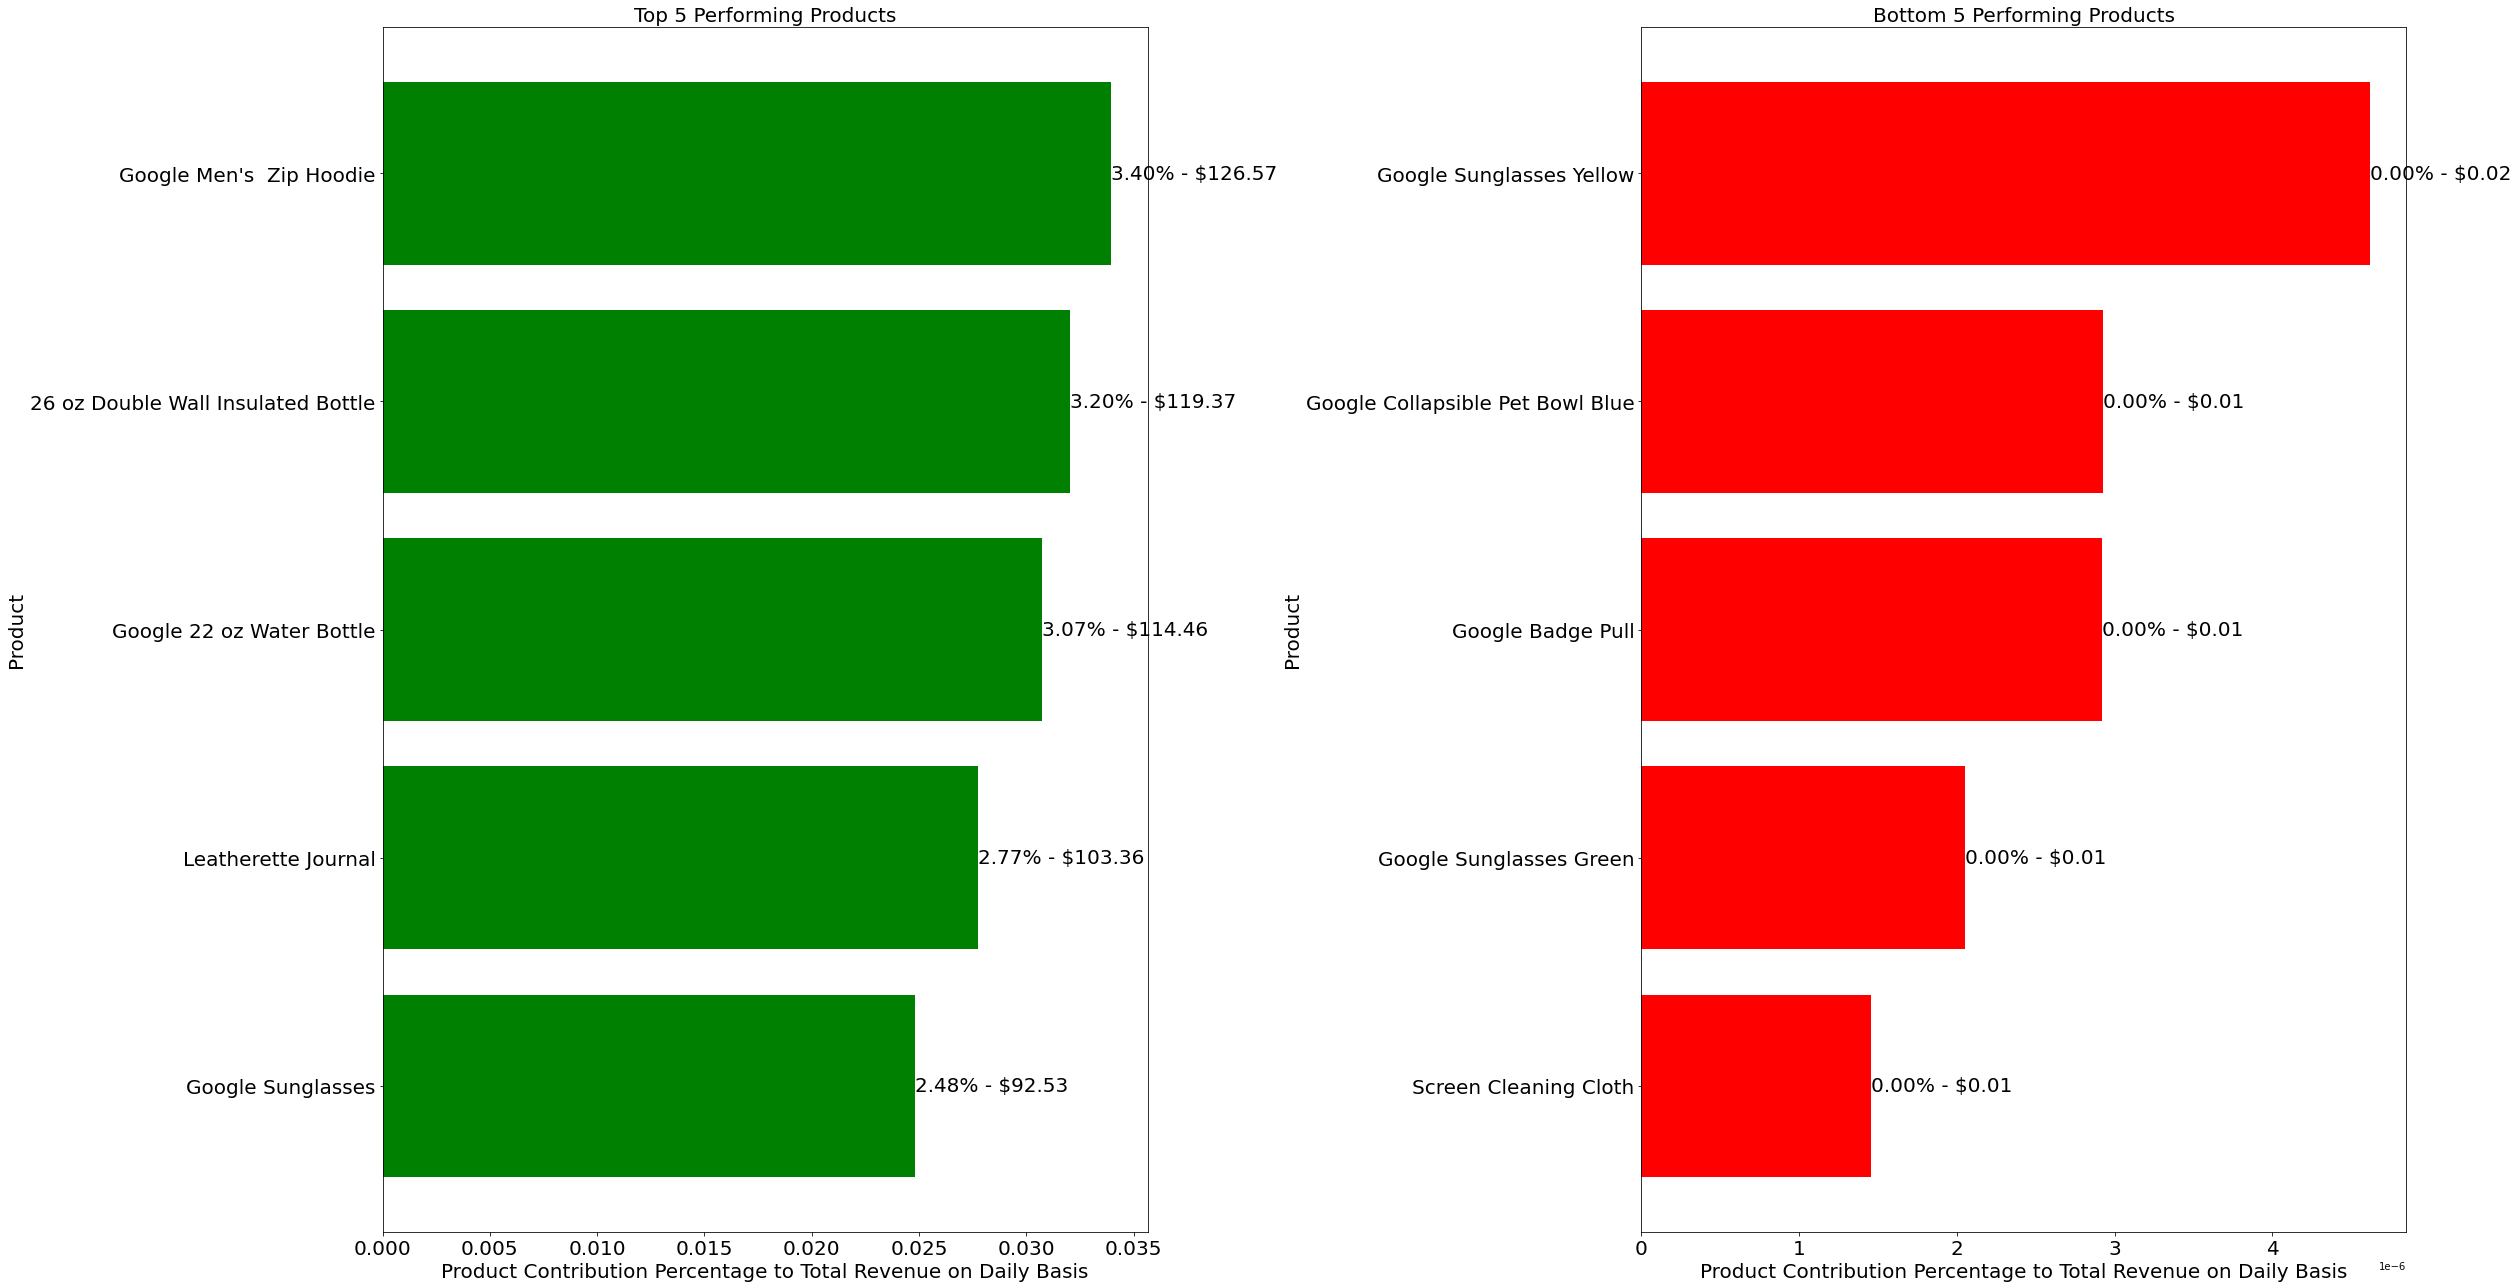

In [17]:
visualize_top_bottom_products(first_problem_data, num_products=5, text_fontsize=20)

Based on the visualization I would like to suggest these solutions: 
 - **Promote top performing products** such as Google Men's Zip Hoodie, 26 oz Double Wall Insulated Bottle, Google 22 oz Water Bottle, and etc to better maximize revenue. Example of promotion can be done **by doing social media leverage, generate content around these top performing products to create awareness such cool products exists!**
 
 
 - **Enhance product pages of top performing products** by showing top performing products at the forefront of the website, so that the first thing the visitor see are these cool products!
 
 
 - **Bundle low performing products with high performing products**, this should increase the value perceptions of low performing products and boost sales of high performing products at the same time.
 
 
 - **Adjust prices for low performing products**, assess the pricing strategy for the bottom-performing products. Consider whether a price reduction or a limited-time discount could stimulate sales

#### Top Performing Product's Categories Based on Total Revenue per Day

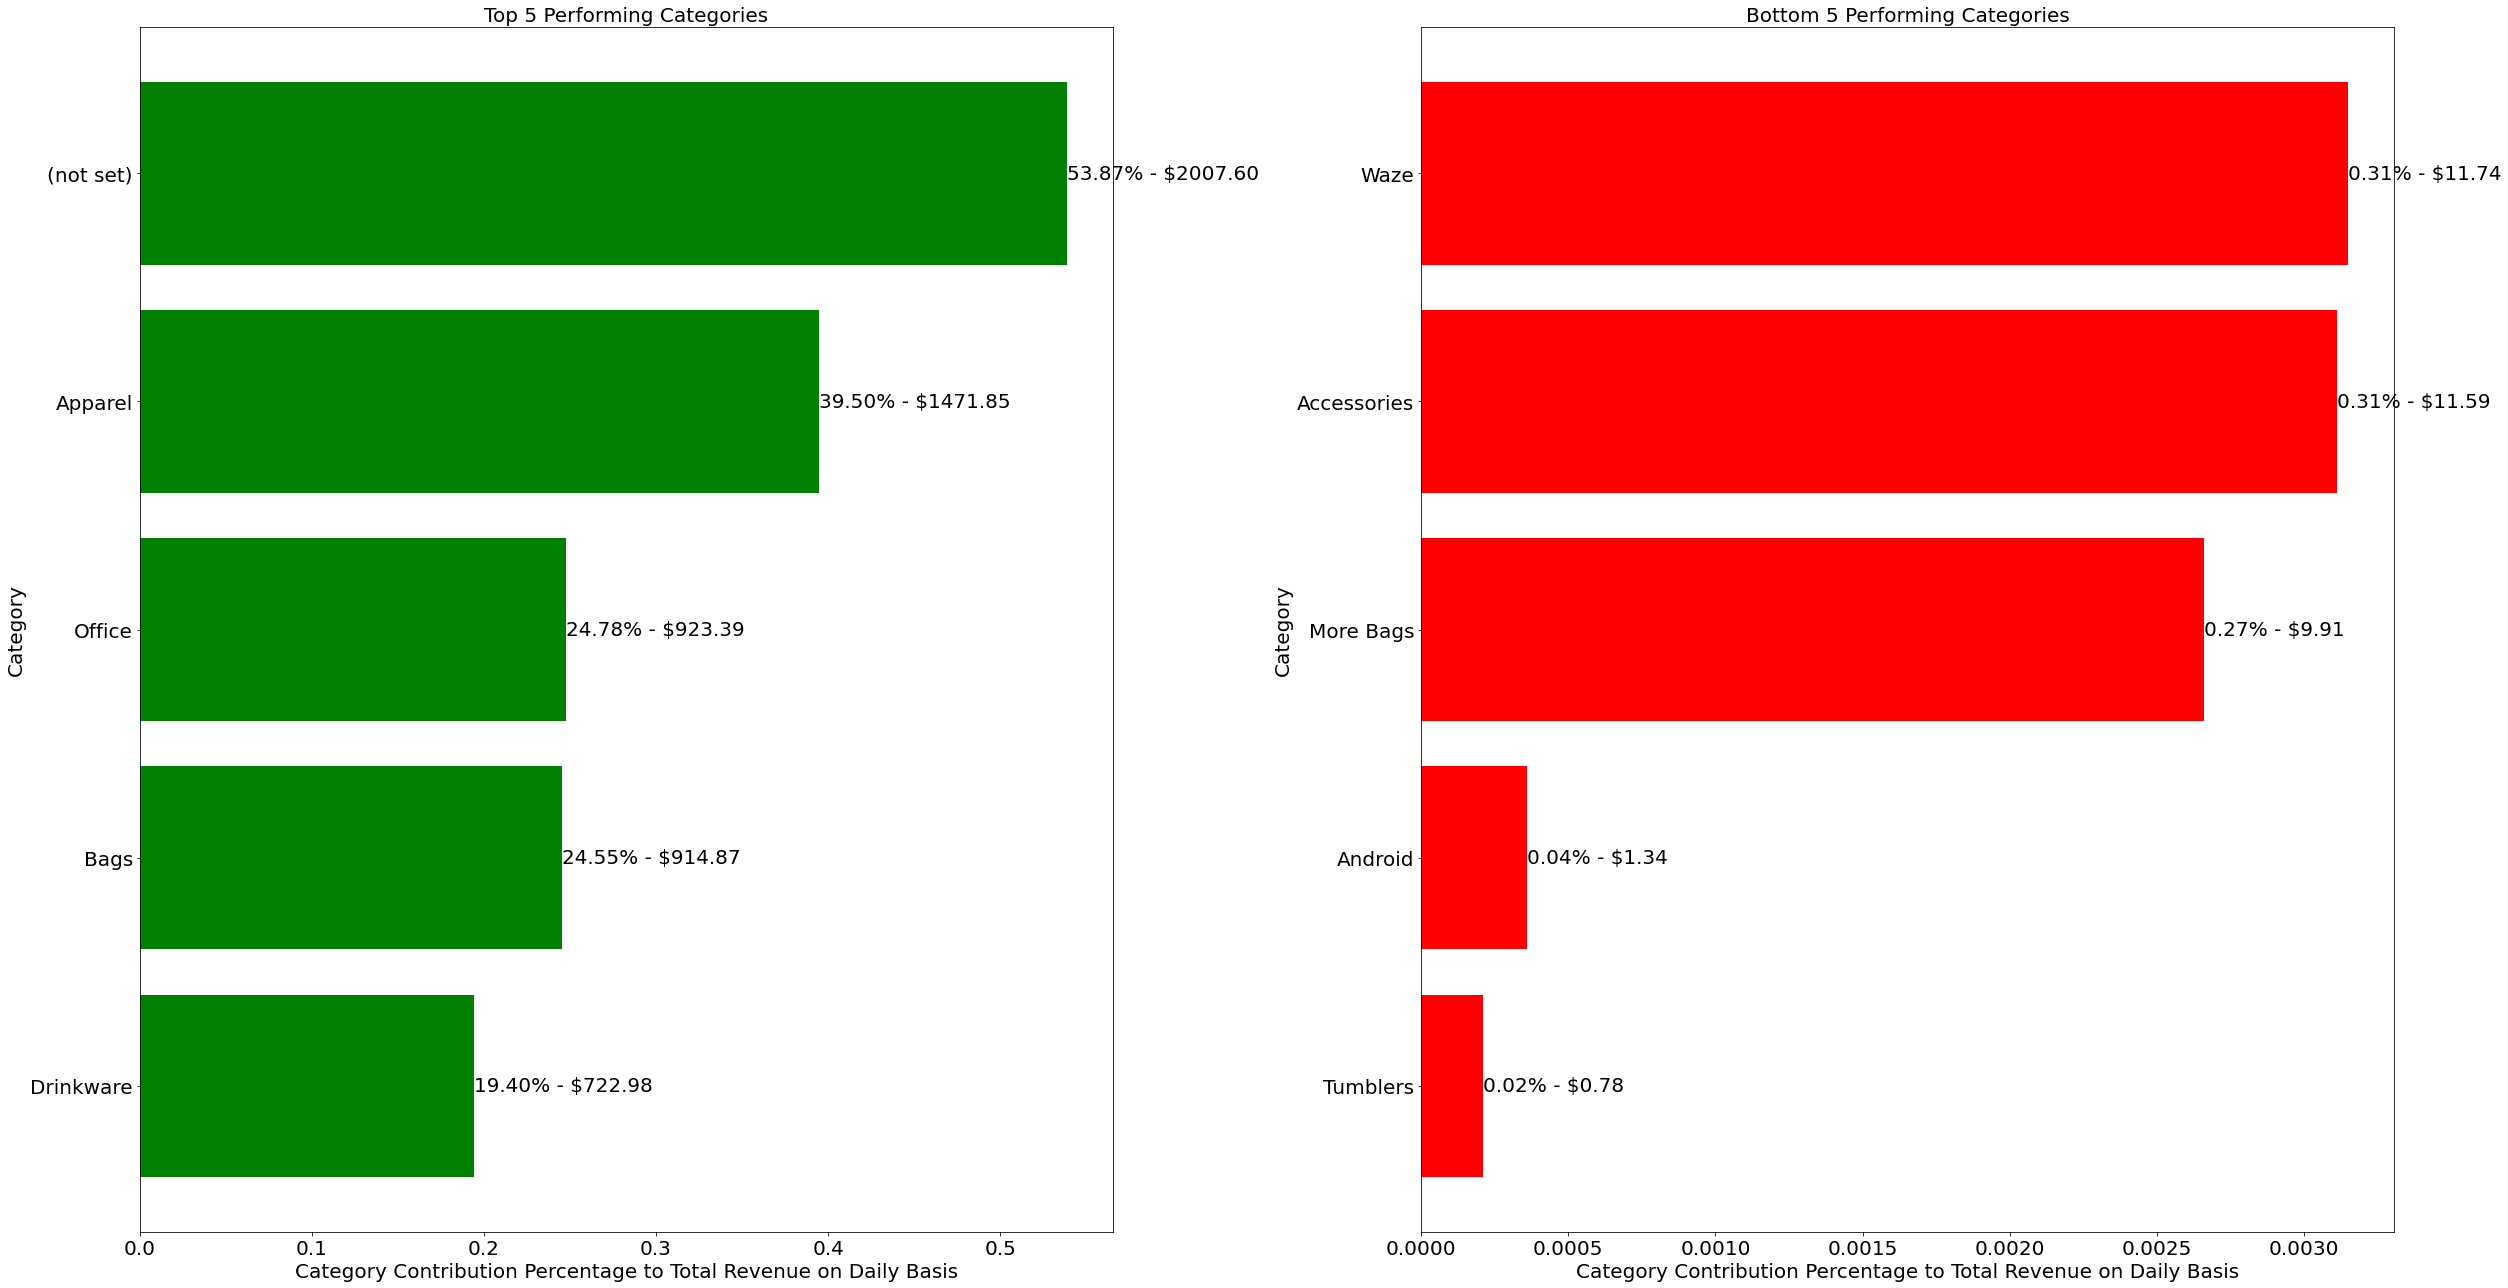

In [18]:
visualize_top_bottom_categories(first_problem_data, num_categories=5, text_fontsize=20)

Based on the visualization I would like to suggest these solutions: 
 - **Minimize uncertain product categories** by categorizing products clearly for easier future analysis. In this case there are many various categories that are grouped together in the '(not set)' category, this make product transaction analysis harder
 
 
 - **Enhance categories pages on top categories** by putting best performing categories as first option when customers are trying to filter products by categories
 
 
 - **Create cross category bundle amongst top performing categories** by putting together product bundling for product's categories that make sense. For example, products from Office, Bags, and Drinkware categories can be bundled together for a "Work from Anywhere Bundle"
 
 
 - **Increase variety of top performing product categories** by introducing new products within that product category
 
 
 - **Consider less diversity in low performing categories** by discontiouing individual products that are the most underperforming in that categories, this way company can save costs on stock keeping and production
 
 
 - **Consider discontiouing severely underperforming categories** such as Tumblers and Android to save costs on stock keeping and productions

#### Top in Demand Products  Based on Monthly Sales

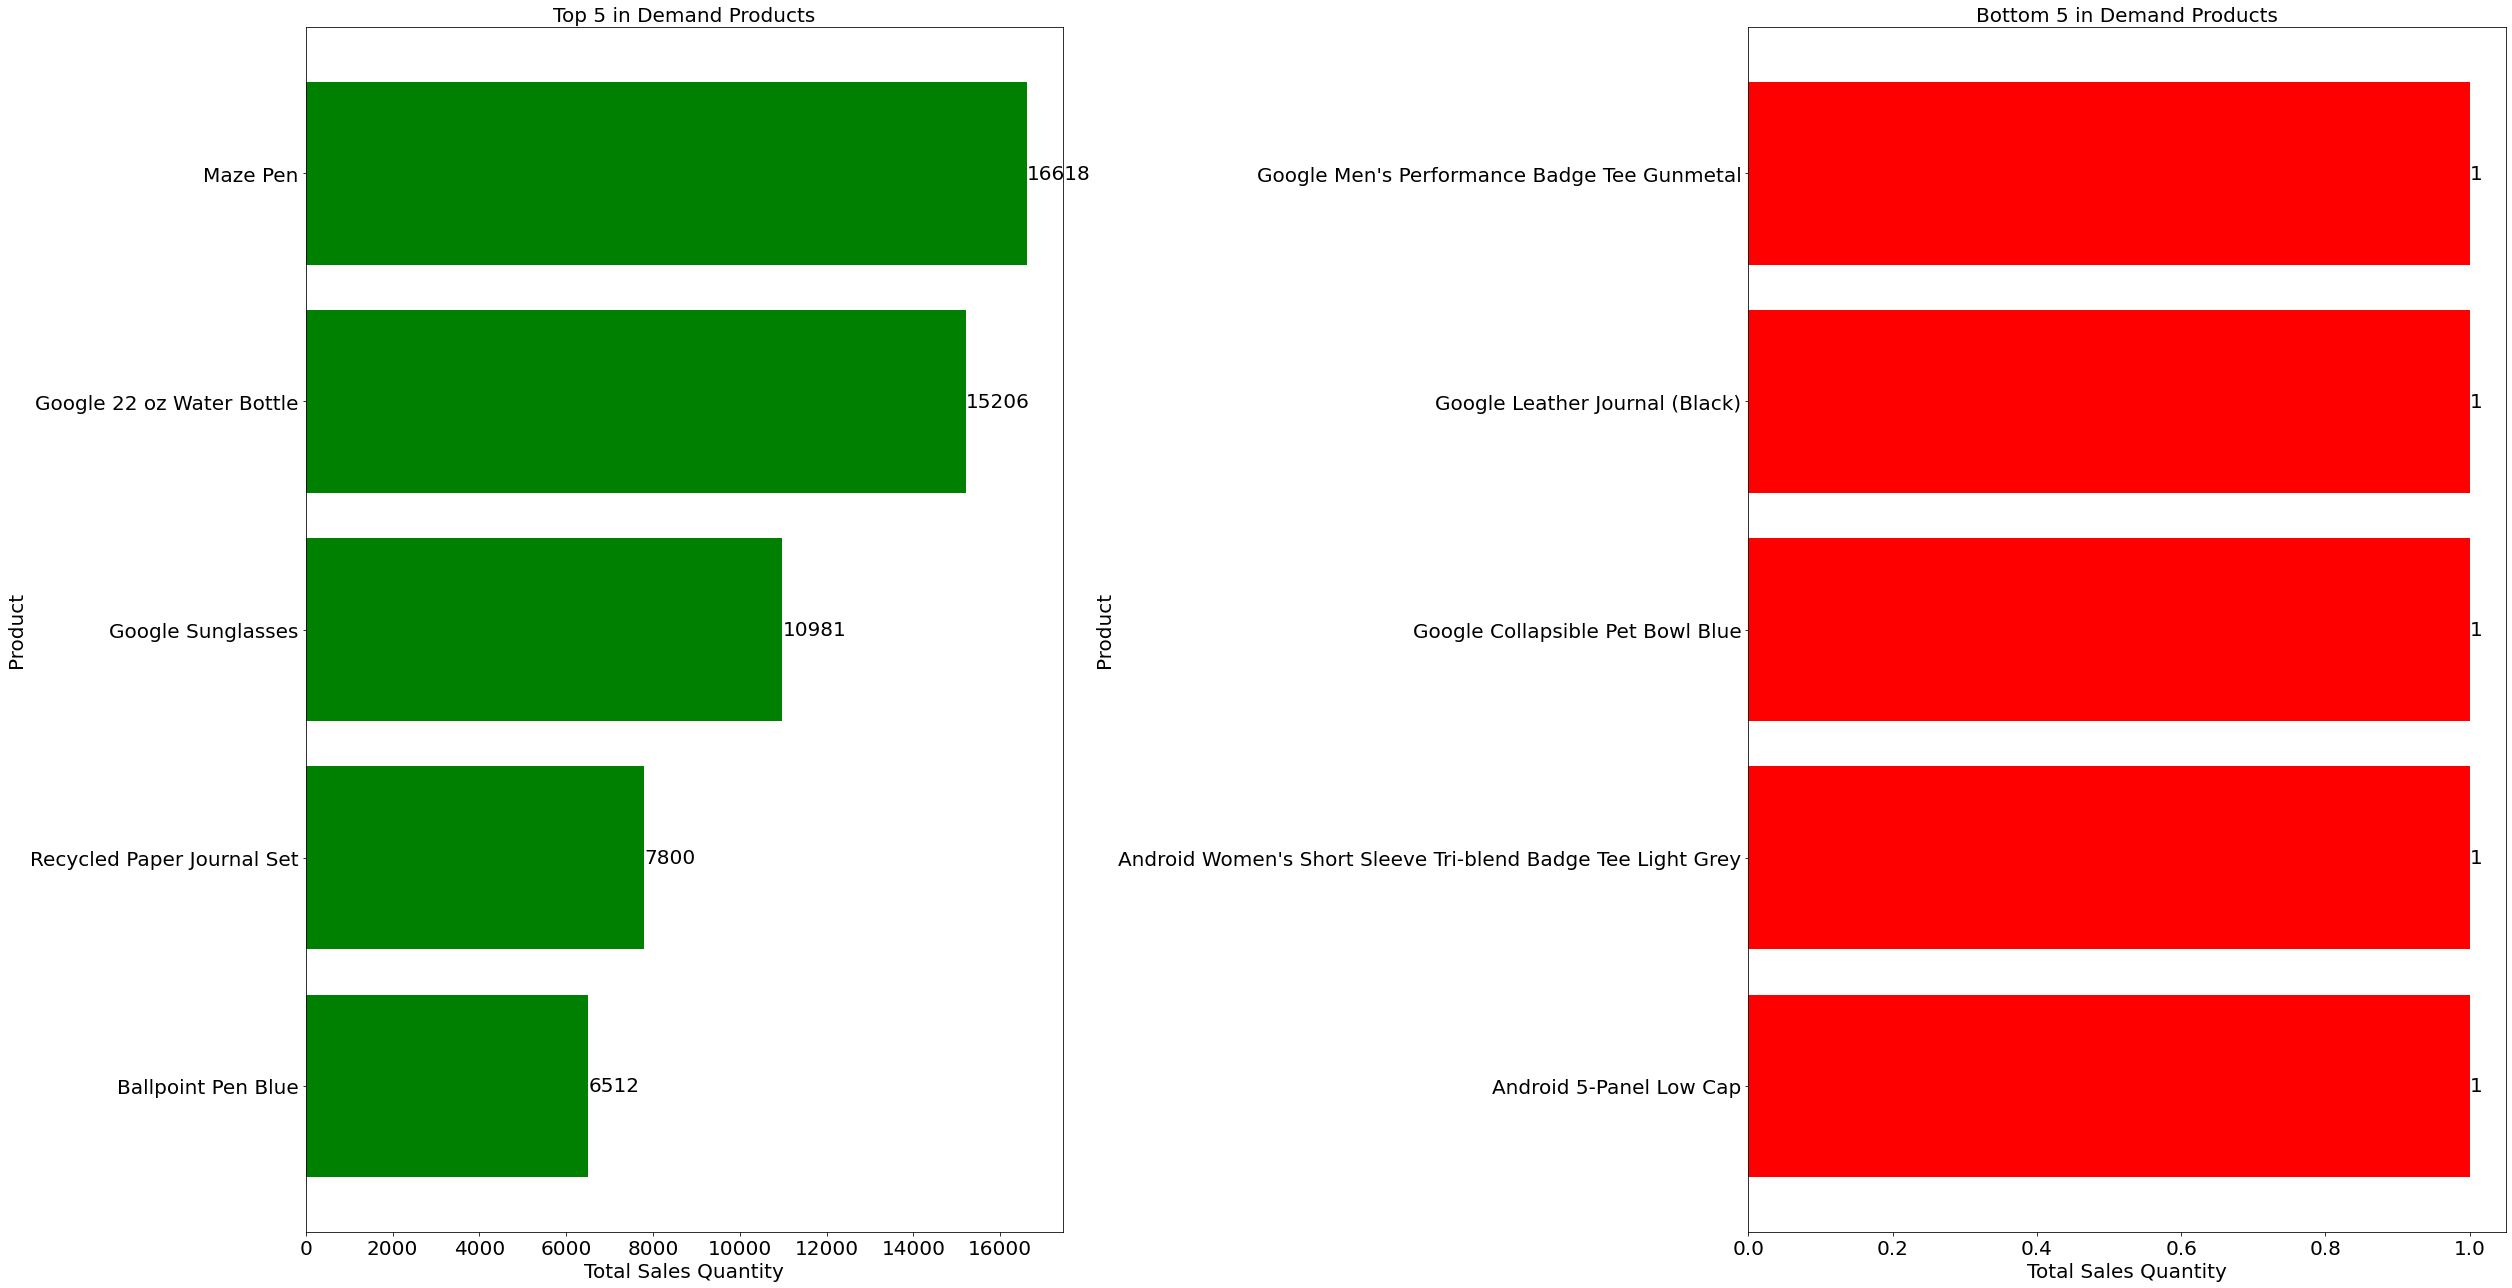

In [19]:
monthly_sales_insights(first_problem_data, num_products=5, text_fontsize=20)

Based on the visualization I would like to suggest these solutions: 

 - **Optimize stock keeping and supply chain management** by implementing robust and up-to-date method to avoid stockouts or stock surplus and ensure efficient flow of products to increase profit
 
 
 - **Optimized product pages / placement** by increasing the visibilities of high demand product to maximize sales
 
 
 - **Consider customization for top performing products** by introducing customization features for high in-demand products to boost attractiveness and hopefully sales

#### Top in Demand Product's Categories Based on Monthly Sales

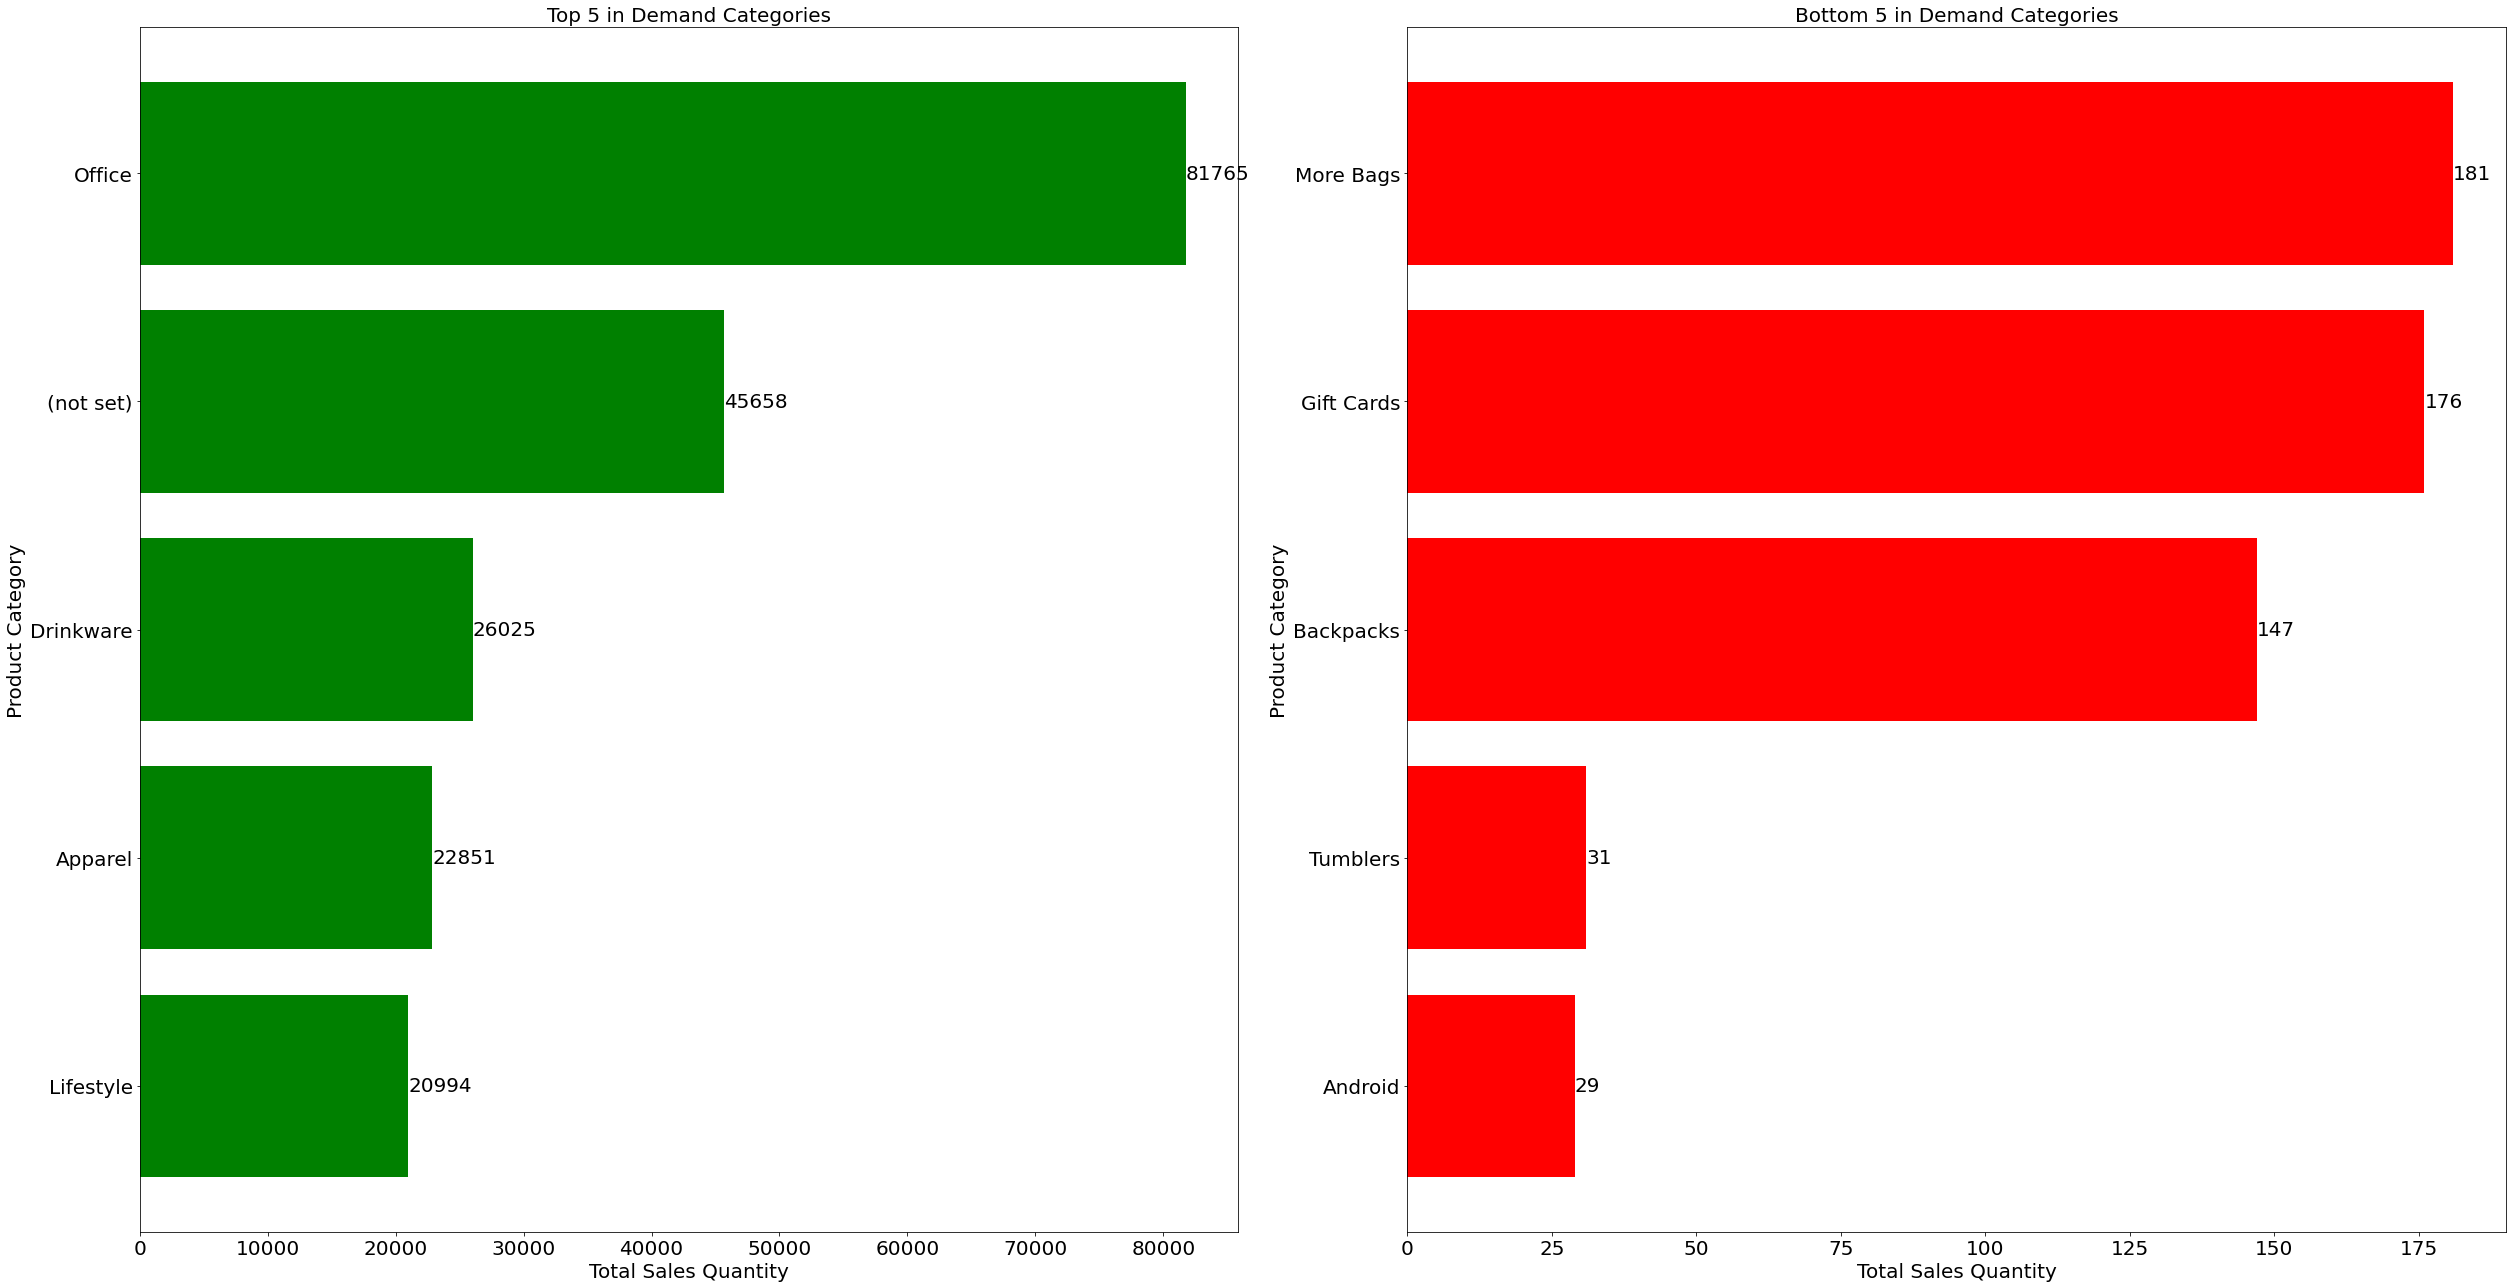

In [20]:
monthly_sales_insights_categories(first_problem_data, num_categories=5, text_fontsize=20)

Based on the visualization I would like to suggest these solutions:

 - **Minimize uncertain product categories** by categorizing products clearly for easier future analysis. In this case there are many various categories that are grouped together in the '(not set)' category, this make product transaction analysis harder

 
 - **Optimize stock keeping and supply chain management** by implementing robust and up-to-date method to avoid stockouts or stock surplus and ensure efficient flow of products to increase profit
 
 
 - **Enhance categories pages on top categories** by increasing the visibility of top performing product's categories in the e-commerce website

#### Correlation Test between Product Price and Purchase Quantity

Spearman's Rank Correlation Coefficient: -0.4316513148896424
P-value: 0.0
The correlation between product price and purchased quantity is statistically significant.


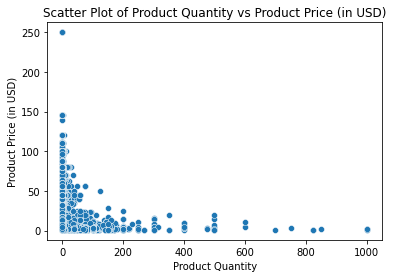

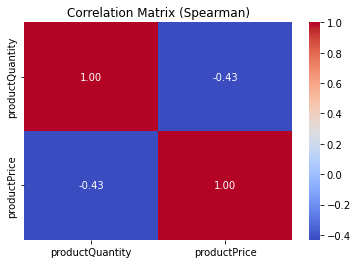

In [21]:
productprice_productquantity_correlation(first_problem_data)

**Based on the results it is noted that product price and quantity of purchase is negatively correlated**. That means the higher the price the lower the purchase quantity. **Strategies that can be implemented with this insight is lowering the price of underperforming products in terms of revenue or sales to increase its performance**

#### Frequently Purchased Together of a Product

In the frequently purchased together section, I will use "Google Men's Zip Hoodie" as a sample since it is the most top performing products in term of total revenue per day. Feel free to use other product names

In [22]:
frequently_purchased_together(first_problem_data, product_name="Google Men's Zip Hoodie", top_n=3)

Top 3 Frequently Purchased Together with 'Google Men's Zip Hoodie':

Google Tri-blend Hoodie Grey: 3 times
Google Vintage Henley Grey/Black: 2 times
Google Sunglasses Red: 2 times


Based on the results, **Google Men's Zip Hoodie product can be bundled with Google Tri-blend Hoodie Grey, Google Sunglasses Red, or Google Vintage Henley Grey/Black.** Promotion to bundled items can boost product transaction interest

## 2. Detect Anomalies in Transaction Number for Specific Products

**Let's get back to ChatGPT answer about the second problem and find ways to improve upon it**


<img src="./ChatGPT Documentation/Answers 1.2.PNG" width="350" align="center">

Now that I read it again, this problem is trends oriented and I think improvements can be made by;

1. Detect Anomalies in Transaction Numbers with Monthly, Daily, and Weekly Options and Visualize the Anomalies (if any)
3. Visualizing Trend of Revenue with Weekly and Monthly Options
4. Visualizing Trend of Sales with Weekly and Monthly Options

**2.1. Data Processing**

Since the data that will be used in the second problem is the same as the first one, I will jump right into the data processing process, first let's make a copy of the first problem data and then create the functions needed for the problem and its improvements

**Copying the first problem dataset**

In [23]:
second_problem_data = first_problem_data.copy()

**Function to detect anomalies in transaction number with daily, weekly, or monthly options**

This function analyzes and visualizes anomalies in transaction data over time. It utilizes a line plot to display the transaction numbers with highlighted anomaly points, which are detected using the standard mean z-score method. Anomalies are identified as points where the absolute z-score exceeds a threshold value. The usual threshold is between 2 to 3, this time I chose 2.5. This approach with a threshold of 2.5 is chosen as it provides a balance between sensitivity to detect potential anomalies and specificity to avoid false positives.

In [24]:
def detect_and_visualize_anomalies(df, interval='monthly'):
    """
    Detect anomalies in transaction numbers and visualize the results.

    Parameters:
    - input_df (DataFrame): The input DataFrame containing transaction data.
    - interval (str, optional): The time interval for resampling ('monthly', 'weekly', or 'daily').
                                Default is 'monthly'.

    Returns:
    None
    """
    if interval not in ['monthly', 'weekly', 'daily']:
        raise ValueError("Invalid interval. Please choose 'monthly', 'weekly', or 'daily'.")
    
    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Convert the 'date' column to datetime format
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    # Set the 'date' column as the index
    df_copy.set_index('date', inplace=True)

    # Exclude data after August 2017
    df_copy = df_copy[df_copy.index < '2017-08-01']

    # Set the start date for resampling to July 2016
    start_date = df_copy.index.min()

    # Resample data based on the chosen interval
    if interval == 'monthly':
        df_resampled = df_copy.resample('M', origin=start_date).count()
    elif interval == 'weekly':
        df_resampled = df_copy.resample('W', origin=start_date).count()
    elif interval == 'daily':
        df_resampled = df_copy.resample('D', origin=start_date).count()

    # Calculate deviations for anomaly detection using standard mean z-score
    z_scores = zscore(df_resampled['transactionId'])

    # Set a threshold for anomaly detection (adjust as needed)
    threshold = 2.5

    # Calculate the mean of the usual transactions
    usual_mean = df_resampled['transactionId'].mean()

    # Plot the transaction numbers with anomaly points in red
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df_resampled, x=df_resampled.index, y='transactionId', marker='o', color='blue')
    
    # Highlight anomaly points in red
    anomalies = df_resampled[abs(z_scores) > threshold]
    if not anomalies.empty:
        for date, count in anomalies.iterrows():
            ax.scatter(x=date, y=count['transactionId'], color='red', s=100, zorder=5)  # Highlight anomaly point

    # Plot the mean of the usual transactions
    ax.axhline(y=usual_mean, color='green', linestyle='--', label=f'Usual Transaction: {usual_mean:.2f} Transactions')

    plt.title(f'Transaction Numbers by {interval.capitalize()} with Anomalies')
    plt.xlabel(interval.capitalize())
    plt.ylabel('Transaction Numbers')
    plt.legend()
    plt.show()

    if not anomalies.empty:
        print("\nAnomalies Detected:")
        for date, count in anomalies.iterrows():
            if interval == 'monthly':
                print(f"{date.strftime('%B %Y')}: {count['transactionId']} transactions")
            else:
                print(f"{date.strftime('%Y-%m-%d')}: {count['transactionId']} transactions")
    else:
        print("\nNo anomalies detected.")

**Function to generate time-series plot to visualize revenue trend with daily, weekly, or monthly options**

Function is designed to generate a time-series plot visualizing the trend of revenue based on transaction data. The function allows for the choice of visualizing the revenue trend on a weekly or monthly basis, with the default option being monthly.

In [25]:
def visualize_revenue_trend(df, interval='monthly'):
    """
    Visualize the trend of revenue with weekly and monthly options.

    Parameters:
    - df: DataFrame containing transaction data
    - interval: 'weekly' or 'monthly', default is 'monthly'
    
    Returns:
    None
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Convert the 'date' column to datetime
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    # Set the 'date' column as the index
    df_copy.set_index('date', inplace=True)
    
    # Exclude data after August 2017
    df_copy = df_copy[df_copy.index < '2017-08-01']
    
    if interval == 'weekly':
        resampled_df = df_copy.resample('W-Mon').sum()
        title = 'Weekly Revenue Trend'
        xlabel = 'Week'
    elif interval == 'monthly':
        resampled_df = df_copy.resample('M').sum()
        title = 'Monthly Revenue Trend'
        xlabel = 'Month'
    else:
        raise ValueError("Invalid interval. Use 'weekly' or 'monthly'.")

    plt.figure(figsize=(12, 6))
    plt.plot(resampled_df.index, resampled_df['productQuantity'] * resampled_df['productPrice'] / 1e6, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Revenue (in USD)')
    plt.grid(True)
    plt.show()

**Function to generate time-series plot to visualize sales trend with daily, weekly, or monthly options**

Function is designed to create a time-series plot illustrating the trend of sales quantity based on transaction data. The function provides flexibility to visualize the sales trend on a weekly or monthly basis, with the default option being monthly.

In [26]:
def visualize_sales_trend(df, interval='monthly'):
    """
    Visualize the trend of sales with weekly and monthly options.

    Parameters:
    - df: DataFrame containing transaction data
    - interval: 'weekly' or 'monthly', default is 'monthly'
    
    Returns:
    None
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Convert the 'date' column to datetime
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    # Set the 'date' column as the index
    df_copy.set_index('date', inplace=True)
    
    # Exclude data after August 2017
    df_copy = df_copy[df_copy.index < '2017-08-01']
    
    if interval == 'weekly':
        resampled_df = df_copy.resample('W-Mon').sum()
        title = 'Weekly Sales Trend'
        xlabel = 'Week'
    elif interval == 'monthly':
        resampled_df = df_copy.resample('M').sum()
        title = 'Monthly Sales Trend'
        xlabel = 'Month'
    else:
        raise ValueError("Invalid interval. Use 'weekly' or 'monthly'.")

    plt.figure(figsize=(12, 6))
    plt.plot(resampled_df.index, resampled_df['productQuantity'], marker='o', color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Sales Quantity')
    plt.grid(True)
    plt.show()

**2.2. Data Analysis**

For this section I will demonstrate the functions usability and do brief data analysis on the output

**Anomalies Detection with Interval Selection (Monthly, Weekly, or Daily)**

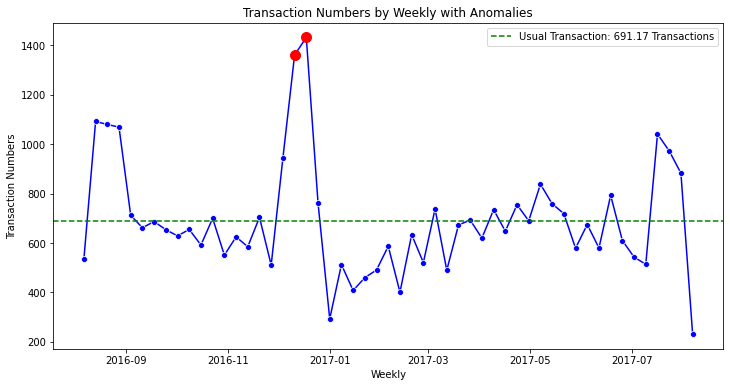


Anomalies Detected:
2016-12-11: 1361 transactions
2016-12-18: 1432 transactions


In [27]:
detect_and_visualize_anomalies(second_problem_data, interval='weekly')

Based on the anomalies detection and visualization results with weekly interval there are anomalies in the mentioned dates. **The dates shows around christmas holiday, which might be the cause of anomaly**

Because of that I suggest that:
 - **Launch holiday specific products and campaigns** to boost number of transactions and potentially revenue
 
 
 - **Limited time discount during the holiday** to boost customer's interest of making a purchase
 
 
 - **Adapted content and massaging** in the website to fit the holiday festive to increase transaction interest
 
 
 - **Adapt shipping and inventory management** to overcome increase in transactions and make sure no customers get their product late for holiday time that will negatively impact company reputation

**Revenue Trends Visualization**

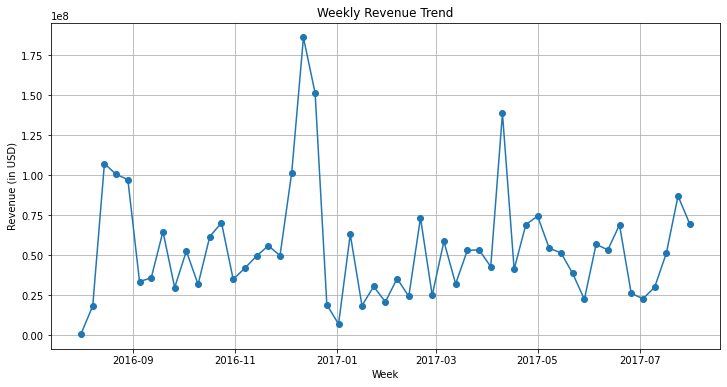

In [28]:
visualize_revenue_trend(second_problem_data, interval='weekly')

**Sales Trends Visualization**

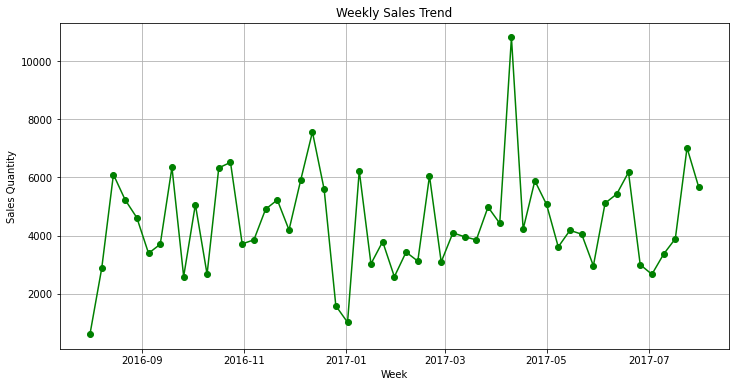

In [29]:
visualize_sales_trend(second_problem_data, interval='weekly')

Based on the visualization I suggest the followings:

 - **Identify seasonal patterns based on the trends** to tailor needed strategies 
 
 
 - **Capacity planning** to ensures meet demand fulfillment during peak periods and optimize resources during slower periods.

## 3. Identify Most Profitable Cities or Province based on Total Transaction Revenue

**3.1. Data Preprocessing**

For this case I need different kind of data to work on. It requires transaction data with customer's location details such as city and country so let's do that first

In [30]:
#Get the needed columns for third problem, which is the transaction and customer's location info and then drop nan values in productQuantity
third_problem_data = query_results[[
    'fullVisitorId', 'country', 'city', 'transactionId', 'productQuantity', 
    'productPrice', 'v2ProductName', 'v2ProductCategory',
    'productSKU', 'currencyCode', 'date'
]].dropna(subset='productQuantity')

third_problem_data

fullVisitorId        country           city    transactionId  \
0      3865822715588380852  United States  Mountain View  ORD201610313767   
2      9891213406376337214  United States       New York  ORD201610313821   
3      9891213406376337214  United States       New York  ORD201610313821   
4      9891213406376337214  United States       New York  ORD201610313821   
8      5944044194057529877  United States       Kirkland  ORD201610313831   
...                    ...            ...            ...              ...   
74435   051257374560700342  United States         Irvine  ORD201608101808   
74436   051257374560700342  United States         Irvine  ORD201608101808   
74437   051257374560700342  United States         Irvine  ORD201608101808   
74438   051257374560700342  United States         Irvine  ORD201608101808   
74439   051257374560700342  United States         Irvine  ORD201608101808   

       productQuantity  productPrice  \
0                   28        790000   
2                    1      44790000   
3                    1      30390000   
4                    2      44790000   
8                   30       1590000   
...                ...           ...   
74435                1      79990000   
74436                1       2000000   
74437                1      13590000   
74438                1       7190000   
74439                1       3990000   

                                           v2ProductName v2ProductCategory  \
0                                               Maze Pen            Office   
2                           Google Women's Fleece Hoodie           Apparel   
3                            Google Infant Zip Hood Pink           Apparel   
4                           Google Women's Fleece Hoodie           Apparel   
8                                       Google Kick Ball         Lifestyle   
...                                                  ...               ...   
74435                                  Solo Pro Backpack         (not set)   
74436                            Ballpoint LED Light Pen         (not set)   
74437  Google Men's 100% Cotton Short Sleeve Hero Tee...         (not set)   
74438                        Engraved Ceramic Google Mug         (not set)   
74439                        Electronics Accessory Pouch         (not set)   

           productSKU currencyCode      date  
0      GGOEGGOA017399          USD  20161031  
2      GGOEGAQB036014          USD  20161031  
3      GGOEGAWN062748          USD  20161031  
4      GGOEGAQB036013          USD  20161031  
8      GGOEGFSR022099          USD  20161031  
...               ...          ...       ...  
74435  GGOEGBRB013899          USD  20160810  
74436  GGOEGOAQ012899          USD  20160810  
74437  GGOEGAAB010514          USD  20160810  
74438  GGOEGDWC020199          USD  20160810  
74439  GGOEGBFC018799          USD  20160810  

[36818 rows x 11 columns]

Now that I have the desired data, let's go into the data processing steps

**3.2. Data Processing**

**Let's get back to ChatGPT answer about the third problem and find ways to improve upon it**


<img src="./ChatGPT Documentation/Answers 1.3.PNG" width="350" align="center">

Now that I read it again, this problem is geographical oriented and I think improvements can be made by;

1. Understanding most profitable country based on total transaction revenue
2. Understanding product preferences by visualizing top purchased products by country
3. Understanding product categories preferences by visualizing top purchased product's category by country
4. Understanding geographical behaviour by visualizing total transaction with line graph with weekly and monthly options by country

Now lets make functions to do that

**Function for understanding the most profitable country based on total transaction revenue**

The function creates a horizontal bar chart depicting the total revenue generated in various countries. It provides an option to focus on the top N countries.

In [31]:
def visualize_total_revenue_by_country(df, top_n=None):
    """
    Visualizes the total revenue by country with an optional filter for top N countries.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing transaction data.
    - top_n (int, optional): Number of top countries to visualize. Defaults to None.

    Returns:
    None: Displays a horizontal bar chart of total revenue by country with values beside each bar.
    """

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Convert the 'date' column to datetime format
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    # Calculate total revenue for each transaction
    df_copy['totalRevenue'] = df_copy['productQuantity'] * (df_copy['productPrice'] / 1e6)

    # Calculate total revenue by country
    total_revenue_by_country = df_copy.groupby('country')['totalRevenue'].sum().sort_values(ascending=False)

    # Apply top_n filter if provided
    if top_n:
        total_revenue_by_country = total_revenue_by_country.head(top_n)

    # Plot the total revenue by country in a horizontal bar chart
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=total_revenue_by_country.values, y=total_revenue_by_country.index, hue=total_revenue_by_country.index, legend=False)

    # Add values beside each bar
    for bar, value in zip(bars.patches, total_revenue_by_country.values):
        bars.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'${value:.2f}', ha='left', va='center')

    plt.title(f'Total Revenue by Country {"(Top " + str(top_n) + ")" if top_n else ""}')
    plt.xlabel('Total Revenue in USD')
    plt.ylabel('Country')
    plt.show()

**Function for visualizing total revenue by city with country as filter**

The function accepts a transaction dataset and an optional top_n parameter, allowing users to specify the number of top cities to visualize. It will generate a horizontal bar chart showing the most impactful cities based on total revenue. 

**Note:** it will exclude unnamed cities like 'not available in demo dataset'

In [32]:
def visualize_revenue_by_city(df, top_n=5, country_filter=None):
    """
    Visualizes the total revenue by city, considering the product quantity and price.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing transaction data.
    - top_n (int, optional): Number of top cities to visualize. Defaults to 5.
    - country_filter (str, optional): Filter the data by country. Defaults to None.

    Returns:
    None: Displays a horizontal bar chart of the top cities by total revenue.
    """

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Convert the 'date' column to datetime format
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    # Exclude 'not available in demo dataset' city
    df_copy = df_copy[df_copy['city'] != 'not available in demo dataset']

    # If a country filter is provided, apply the filter
    if country_filter:
        df_copy = df_copy[df_copy['country'] == country_filter]

    # Calculate total revenue by city
    df_copy['totalRevenue'] = df_copy['productQuantity'] * (df_copy['productPrice'] / 1e6)
    total_revenue_by_city = df_copy.groupby('city')['totalRevenue'].sum().sort_values(ascending=False).head(top_n)

    # Plot the total revenue by city in a horizontal bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_revenue_by_city.values, y=total_revenue_by_city.index, hue=total_revenue_by_city.index, legend=False)
    plt.title(f'Top {top_n} Cities by Total Revenue ({country_filter.capitalize() if country_filter else "All Countries"})')
    plt.xlabel('Total Revenue in USD')
    plt.ylabel('City')
    plt.show()

**Function for understanding product preferences by visualizing top products with country as a filter**

Function analyzes transaction data, highlighting the most popular products by quantity sold. It allows optional filtering by country. It will generate a horizontal bar chart showing the most demanded products based on quantity sold. 

In [33]:
def visualize_top_products_by_country(df, country_filter=None, top_n=5):
    """
    Visualizes the top products by quantity sold in a specific country.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing transaction data.
    - country_filter (str, optional): Filter the data by country. Defaults to None.
    - top_n (int, optional): Number of top products to visualize. Defaults to 5.

    Returns:
    None: Displays a horizontal bar chart of the top products by quantity sold.
    """

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Convert the 'date' column to datetime format
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')
    
    # If a country filter is provided, apply the filter
    if country_filter:
        df_copy = df_copy[df_copy['country'] == country_filter]

    # Calculate total quantity sold for each product
    total_quantity_by_product = df_copy.groupby('v2ProductName')['productQuantity'].sum().sort_values(ascending=False).head(top_n)

    # Plot the top products by quantity sold in a horizontal bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_quantity_by_product.values, y=total_quantity_by_product.index, hue=total_quantity_by_product.index, legend=False)
    plt.title(f'Top {top_n} Products in {country_filter.capitalize() if country_filter else "All Countries"} by Quantity Sold')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Product')
    plt.show()

**Function for understanding geographical behaviour by visualizing total transaction in line graph with weekly and monthly options by country**

The function displays a line graph showcasing the total transactions over time with optional country filtering. It will generate line graph time series chart

In [34]:
def visualize_total_transaction(df, country_filter=None, interval='monthly'):
    """
    Visualizes the total transaction over time with optional filtering by country.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing transaction data.
    - country_filter (str, optional): Filter the data by country. Defaults to None.
    - interval (str, optional): Resampling interval, either 'monthly' or 'weekly'. Defaults to 'monthly'.

    Returns:
    None: Displays a line graph of total transactions over time.
    """

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Convert the 'date' column to datetime format
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')
    
    # If a country filter is provided, apply the filter
    if country_filter:
        df_copy = df_copy[df_copy['country'] == country_filter]

    # Set the 'date' column as the index
    df_copy.set_index('date', inplace=True)
    
    # Exclude data after August 2017
    df_copy = df_copy[df_copy.index < '2017-08-01']
    
    # Resample data based on the chosen interval
    if interval == 'monthly':
        df_resampled = df_copy.resample('M').count()
    elif interval == 'weekly':
        df_resampled = df_copy.resample('W').count()

    # Plot the total transactions over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_resampled, x=df_resampled.index, y='transactionId', marker='o')
    plt.title(f'Total Transactions Over Time ({interval.capitalize()} View) for {country_filter.capitalize() if country_filter else "All Countries"}')
    plt.xlabel('Date')
    plt.ylabel('Total Transactions')
    plt.show()

**3.3. Data Analysis**

For this section I will demonstrate the functions usability and do brief data analysis on the output

**Top Performing Cities in Selected Country**

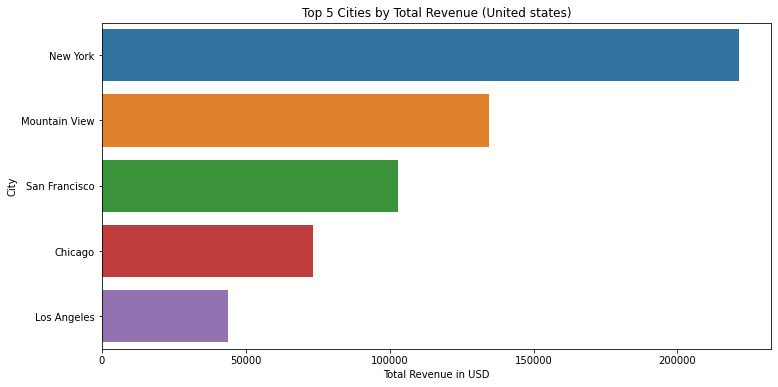

In [35]:
visualize_revenue_by_city(third_problem_data, top_n=5, country_filter='United States')

Based on the visualization I suggest the followings:

 - **Maximize promotion** in New York, Mountain View, San Fransisco, Chicago, and Los Angeles for United States
 
 
 - **Collaborate with Top Performing Cities** based on selected countries to create exclusive products 

**Top Performing Countries by Total Revenue**

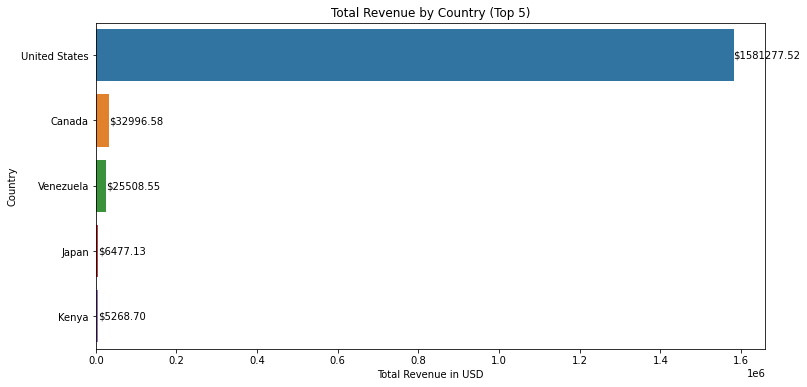

In [36]:
visualize_total_revenue_by_country(third_problem_data, top_n=5)

Based on the visualization I suggest the followings:

 - **Allocate more sources for high performing countries** to stimulate revenues to potentially increase profitability
 
 
 - **Maintain performance by doing behavioral and policies research** to target specifics top performing countries 

**Top Performing Products in Selected Country**

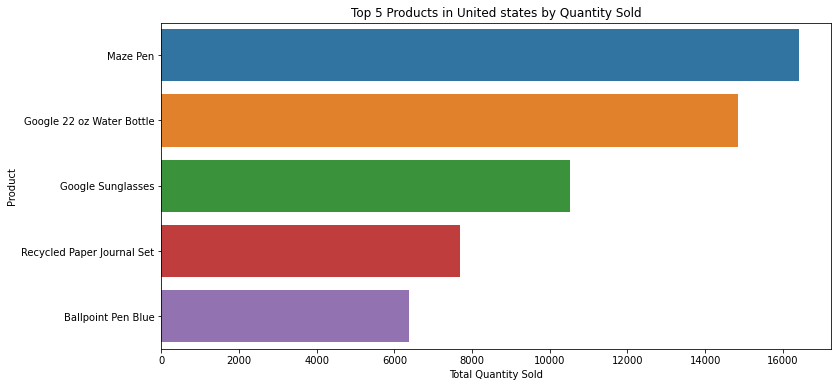

In [37]:
visualize_top_products_by_country(third_problem_data, top_n=5, country_filter='United States')

Based on the visualization I suggest the followings:

 - **Create personalized discounts and marketing in specific countries based on top performing products** 

 
 - **Adjust product visibility according to countries** to better maximize sales

**Transactions Trends Based on Selected Countries with Interval Filter**

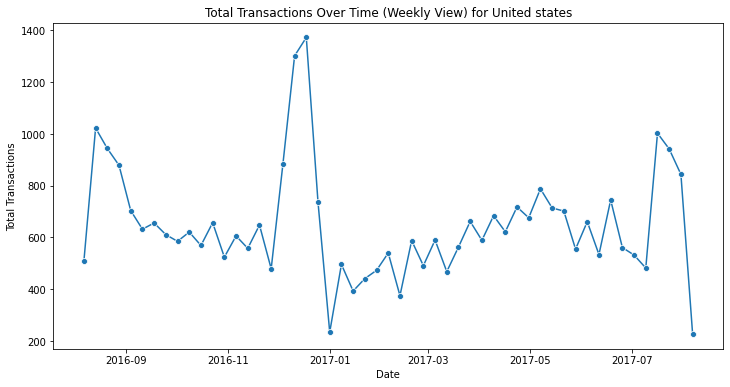

In [38]:
visualize_total_transaction(third_problem_data, interval='weekly', country_filter='United States')

Based on the transactions trend, **find seasonal trends according to each countries and adjust business strategies to maximize opportunities**

## Export Data for Management

Now that data analysis using the queried data is proven possible, let's export the queried data for the management to use

In [39]:
query_results.to_csv(r'additional_data_for_management.csv')

Now that I've provided more data for the desired scenario, I hope management will be happy!

<img src="https://media1.tenor.com/m/tArT-pNvGiQAAAAC/cry-cat.gif" width="200" align="center">

## Funnel Analysis for Improving Ecommerce Platform (Improvements)

So based on the answers of ChatGPT, I decided that ChatGPT missed on an important sentence which is that **the client wants to better understand user behavior and improve its ecommerce platform** and instead focuses heavily on several scenario provided by management and give no further suggestions besides that.

I have researched methods that will greatly impact on ecommerce platform improvement based on ChatGPT answers and papers research finally found that Funnel Analysis will be greatly useful. The followings are the process on why I decided on Funnel Analysis

First, I give ChatGPT prompt to suggest any methods on user behavior analysis to improve an ecommerce platform

**Prompt:**

<img src="./ChatGPT Documentation/Prompt 2.png" width="400" align="center">


**Answers:**

<img src="./ChatGPT Documentation/Answers 2.png" width="400" align="center">

One of the results suggest funnel analysis where it first track the user behaviour then track where does the user drop off their buying process, then I did papers research and also found that Google itself provide funnel analysis for their Google Analytics services which the paper can be found [here](https://publication.petra.ac.id/index.php/ilmu-komunikasi/article/download/11407/10020)

So based on that I choose Funnel Analysis as an improvements from ChatGPT answers

### Stratified Sampling

The original data from bigquery contains millions of rows that proves analysis on such big data with constrained deadline impossible, so I choose to resample the data using stratified resampling to provide the closest representation of the population of the data

<h3><center>Visualization of Stratified Sampling</center></h3>
<img src="https://junkxs.com/3481de95/https/370cc4/www.simplypsychology.org/wp-content/uploads/stratified-sampling-1024x853.jpeg" width="400" align="center">

For Stratified Sampling I choose to select one day out of all possible months randomly, the query to do that is provided below

#### Stratified Sampling Query

For the stratified sampling query it first select 12 days, one day from each months, then we use that to query data from the database and finally have the desired dataframe to do funnel analysis

#### Generate Random Date Function

In [40]:
def generate_random_date(start_date, end_date):
    """
    Generates a list of randomly selected formatted dates within the specified date range.

    Parameters:
    - start_date (datetime): The start date of the range.
    - end_date (datetime): The end date of the range.

    Returns:
    list: A list of randomly selected formatted dates in "YYYYMMDD" format.
    """
    delta = end_date - start_date

    # List to store randomly selected formatted dates
    random_formatted_dates = []

    # Loop through each month
    current_date = start_date
    while current_date < end_date:
        # Calculate the number of days in the current month
        if current_date.month == 12:
            days_in_month = (datetime(current_date.year + 1, 1, 1) - current_date).days
        else:
            days_in_month = (datetime(current_date.year, current_date.month + 1, 1) - current_date).days

        # Generate a random day within the current month
        random_day = random.randint(1, days_in_month)

        # Add the random date to the list and format it as "YYYYMMDD"
        random_formatted_dates.append(current_date.replace(day=random_day).strftime("%Y%m%d"))

        # Move to the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return random_formatted_dates

# Define the range based on the available months of the databse
start_date = datetime(2016, 8, 1)
end_date = datetime(2017, 8, 1)

# Generate random formatted dates for each month
random_formatted_dates = generate_random_date(start_date, end_date)

#### Querying the desired data based on the selected dates

In [41]:
selected_columns = [
    'fullVisitorId', 'hits.eCommerceAction.action_type', 'date'
]

# Create an empty DataFrame to store the concatenated results
concatenated_dataframe = pd.DataFrame()

for date in random_formatted_dates:
    # Construct the SQL query with the selected columns
    query = f"""
    SELECT
        {', '.join(selected_columns)}
    FROM
        `{project_id}.{dataset_id}.ga_sessions_{date}`,
        UNNEST(hits) as hits
    WHERE
        hits.eCommerceAction.action_type IN ('1', '2', '3', '5', '6')
    """

    # Run the query
    query_job = client.query(query)

    # Fetch the results into a Pandas DataFrame
    funnel_query = query_job.to_dataframe()
    
    # Concat the results
    concatenated_dataframe = pd.concat([concatenated_dataframe, funnel_query], ignore_index=True)

concatenated_dataframe

fullVisitorId action_type      date
0      3301131136825297621           1  20160802
1      3301131136825297621           2  20160802
2      3301131136825297621           1  20160802
3      3301131136825297621           2  20160802
4      3301131136825297621           2  20160802
...                    ...         ...       ...
34552  6582873681368793742           2  20170712
34553  6582873681368793742           1  20170712
34554  6582873681368793742           3  20170712
34555  6582873681368793742           5  20170712
34556  6582873681368793742           5  20170712

[34557 rows x 3 columns]

#### Data Preprocessing

First let's decode the action_type for readability

In [42]:
# Mapping of action_type labels to meanings
action_type_mapping = {
    '1': 'Product lists',
    '2': 'Product detail views',
    '3': 'Add product(s) to cart',
    '5': 'Check out',
    '6': 'Completed purchase'
}

# Decode action_type labels
concatenated_dataframe['action'] = concatenated_dataframe['action_type'].map(action_type_mapping)

# Display the result
concatenated_dataframe

fullVisitorId action_type      date                  action
0      3301131136825297621           1  20160802           Product lists
1      3301131136825297621           2  20160802    Product detail views
2      3301131136825297621           1  20160802           Product lists
3      3301131136825297621           2  20160802    Product detail views
4      3301131136825297621           2  20160802    Product detail views
...                    ...         ...       ...                     ...
34552  6582873681368793742           2  20170712    Product detail views
34553  6582873681368793742           1  20170712           Product lists
34554  6582873681368793742           3  20170712  Add product(s) to cart
34555  6582873681368793742           5  20170712               Check out
34556  6582873681368793742           5  20170712               Check out

[34557 rows x 4 columns]

#### Data Processing

Before creating the funnel graphs I create the funnel dataframe first for readability in tabular form and make the visualization process easier 

In [43]:
# Define the steps for the funnel
funnel_steps = ['Product lists', 'Product detail views', 'Add product(s) to cart', 'Check out', 'Completed purchase']

# Filter DataFrame for each step
funnel_data = {}
for step in funnel_steps:
    step_df = concatenated_dataframe[concatenated_dataframe['action'] == step]
    funnel_data[step] = step_df['fullVisitorId'].nunique()

# Display the funnel analysis
funnel_df = pd.DataFrame(list(funnel_data.items()), columns=['Step', 'Unique Visitors'])

funnel_df

Step  Unique Visitors
0           Product lists             3831
1    Product detail views             3822
2  Add product(s) to cart             1539
3               Check out              702
4      Completed purchase              359

#### Funnel Analysis Based on Stratified Sampling

**What is funnel analysis?**

Conversion funnel analysis helps understand exactly how people are interacting with an app. It visualizes the user journey to show you how many people convert and where they drop off. Funnels are used to discover friction points and zero in on areas that will have the greatest impact on growth. 

**Funnel Analysis Example**
<img src="https://clevertap.com/wp-content/uploads/2017/10/Incontent_7.png" width="500" align="center">

In [44]:
# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=funnel_df['Step'],
    x=funnel_df['Unique Visitors'],
    textinfo="value+percent initial",
    marker=dict(color=["deepskyblue", "lightsalmon", "tan", "darkorange", "crimson"])
))

# Update layout
fig.update_layout(
    title_text="Funnel Analysis with Conversion Rates",
    xaxis_title="Number of Visitors",
    yaxis_title="Funnel Step",
)

# Show the plot
fig.show()

Based on the funnel analysis there are certain insights and recommendation which is:

1. **There are bottlenecks in product detail views and add product(s) to cart pages**, investigating why the bottlenecks happens can prove useful to **improve product detail views and add product(s) to cart pages**


2. **Finding user segments that are more successful at certain steps** to give important insights about who to target in the future — and why other users got stuck. **Use cohort analysis to dig deeper into the reasons users aren’t converting.** Are they all on an older version of the app that’s crashing? How long have they been using the app? What about users who do convert — do they search for products rather than browse? Do they rate or review products? 

# End of Case 

I hope that through this solution I can convince assesors about my skills. Thank you so much for the opportunity to solve such challenging case!